# **CT7205 - Machine Learning and Optimisation**
## Data-Driven Insights into 4G and 5G Networks Using Machine Learning and Optimization Techniques

### Title of Contents
1. Task 1:  Data Preprocessing and Exploration
    - 1.1 Data Exploration
    - 1.2 Handling missing values
    - 1.3 Outlier Detection
    - 1.4 Skewness Transformation
    - 1.5 Correlation Matrix Analysis
    - 1.6 Encoding and scaling
2. Task 2:  Clustering Analysis
    - KMeans clustering
    - DBSCAN
    - Agglomerative clustering
    - Gaussian mixture model
3. Task 3:  Classification
   - Binary classification
   - Multi classification
3. Task 4:  Optimization Using Genetic Algorithms
   - GA on clustering

## Task 1: - Data Preprocessing and Exploration 

In [3]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# setting the option to display maximun columns
sns.set(style="whitegrid")
pd.set_option('display.max_columns',None)

In [7]:
#Loading dataset

df_4g = pd.read_csv("4G - Passive Measurements.csv")

# 1.1 Data Exploration

In [10]:
#Data exploration
#printing basic information about dataset
print("Shape of dataset",df_4g.shape) # number of rows and columns

Shape of dataset (527540, 27)


In [12]:
# Displaying the columns in dataset
print("Columns in the dataset:\n ",df_4g.columns.tolist()) # list of columns 

Columns in the dataset:
  ['Unnamed: 0', 'Date', 'Time', 'UTC', 'Latitude', 'Longitude', 'Altitude', 'Speed', 'EARFCN', 'Frequency', 'PCI', 'MNC', 'CellIdentity', 'eNodeB.ID', 'Power', 'SINR', 'RSRP', 'RSRQ', 'scenario', 'cellLongitude', 'cellLatitude', 'cellPosErrorLambda1', 'cellPosErrorLambda2', 'n_CellIdentities', 'distance', 'Band', 'campaign']


In [14]:
# view first five rows of dataset
print("First five rows of 4G dataset:\n" )
df_4g.head()

First five rows of 4G dataset:



Unnamed: 0        Date          Time           UTC   Latitude  Longitude  \
0      231098  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302   
1      241306  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302   
2      291097  14.01.2021  09:19:28.840  1.613291e+09  41.896721  12.507287   
3      741040  14.01.2021  09:19:36.195  1.613291e+09  41.896759  12.507209   
4      781036  14.01.2021  09:19:36.549  1.613291e+09  41.896759  12.507209   

   Altitude  Speed  EARFCN  Frequency  PCI      MNC  CellIdentity  eNodeB.ID  \
0     53.66   4.03    6300      806.0  412  "Op"[1]      76860425     300236   
1     53.66   4.03    6300      806.0  411  "Op"[1]      76860427     300236   
2     54.85   4.07    1350     1820.0  272  "Op"[1]      76860417     300236   
3     54.82   4.03    3025     2647.5  266  "Op"[2]      17695029      69121   
4     54.82   4.03    6300      806.0  412  "Op"[1]      76860425     300236   

   Power   SINR   RSRP   RSRQ scenario  cellLongitude  cellLatitude  \
0 -54.38   6.70 -78.68 -19.41       OW      12.504280     41.890300   
1 -52.63   5.18 -75.54 -16.26       OW      12.504280     41.890300   
2 -42.65  23.45 -63.91 -13.48       OW      12.504280     41.890300   
3 -61.27  12.11 -86.11 -14.56       OW      12.507148     41.896951   
4 -48.81   1.44 -71.21 -17.41       OW      12.504280     41.890300   

   cellPosErrorLambda1  cellPosErrorLambda2  n_CellIdentities    distance  \
0            10.610001            10.610001                 6  757.483987   
1            10.610001            10.610001                 6  757.483987   
2             2.392951             0.838046                 6  756.968865   
3            12.490001            12.490001                 6   21.962869   
4            10.610001            10.610001                 6  758.872653   

   Band                 campaign  
0    20  campaign_6_OW_4G_gaming  
1    20  campaign_6_OW_4G_gaming  
2     3  campaign_6_OW_4G_gaming  
3     7  campaign_6_OW_4G_gaming  
4    20  campaign_6_OW_4G_gaming

In [13]:
# view last five rows of dataset
print("Last five rows of 4G dataset:\n" )
df_4g.tail()

Last five rows of 4G dataset:



Unnamed: 0        Date          Time           UTC   Latitude  \
527535       43501  13.12.2020  11:54:37.247  1.610535e+09  41.871578   
527536       43521  13.12.2020  11:54:37.247  1.610535e+09  41.871578   
527537       43611  13.12.2020  11:54:37.439  1.610535e+09  41.871578   
527538       43621  13.12.2020  11:54:37.439  1.610535e+09  41.871578   
527539       43631  13.12.2020  11:54:37.439  1.610535e+09  41.871578   

        Longitude  Altitude  Speed  EARFCN  Frequency  PCI      MNC  \
527535  12.463104     97.87   0.61    1350     1820.0    8  "Op"[1]   
527536  12.463104     97.87   0.61    1350     1820.0   77  "Op"[1]   
527537  12.463104     97.87   0.61    3175     2662.5  310  "Op"[1]   
527538  12.463104     97.87   0.61    3175     2662.5  311  "Op"[1]   
527539  12.463104     97.87   0.61    3175     2662.5  126  "Op"[1]   

        CellIdentity  eNodeB.ID  Power   SINR   RSRP   RSRQ scenario  \
527535      76827905     300109 -74.87 -10.65 -92.57 -19.26       IS   
527536      76816391     300064 -69.34   1.14 -91.07 -17.85       IS   
527537      76816394     300064 -66.63  -5.11 -87.82 -19.57       IS   
527538      76816395     300064 -61.56   5.79 -80.12 -11.87       IS   
527539      76827909     300109 -72.07  -9.77 -89.71 -16.22       IS   

        cellLongitude  cellLatitude  cellPosErrorLambda1  cellPosErrorLambda2  \
527535      12.463643     41.871855            19.560003            19.560003   
527536      12.461764     41.871894            11.785002            11.785002   
527537      12.461764     41.871894            20.130005            20.130005   
527538      12.461764     41.871894            20.130005            20.130005   
527539      12.463643     41.871855            18.040005            18.040005   

        n_CellIdentities    distance  Band            campaign  
527535                 5   54.286957     3  campaign_118_IS_4G  
527536                 8  116.513722     3  campaign_118_IS_4G  
527537                 8  116.513722     7  campaign_118_IS_4G  
527538                 8  116.513722     7  campaign_118_IS_4G  
527539                 5   54.286957     7  campaign_118_IS_4G

In [15]:
# get general information about dataset
print("General information of dataset:\n ")
df_4g.info()

General information of dataset:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527540 entries, 0 to 527539
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           527540 non-null  int64  
 1   Date                 527540 non-null  object 
 2   Time                 527540 non-null  object 
 3   UTC                  457201 non-null  float64
 4   Latitude             527540 non-null  float64
 5   Longitude            527540 non-null  float64
 6   Altitude             457201 non-null  float64
 7   Speed                457201 non-null  float64
 8   EARFCN               527540 non-null  int64  
 9   Frequency            527540 non-null  float64
 10  PCI                  527540 non-null  int64  
 11  MNC                  527540 non-null  object 
 12  CellIdentity         527540 non-null  int64  
 13  eNodeB.ID            527540 non-null  int64  
 14  Power                505826 non-nu

In [17]:
#view statistics of the dataset
print("Summary statistics of 4G dataset:\n ")
df_4g.describe()

Summary statistics of 4G dataset:
 


Unnamed: 0           UTC       Latitude      Longitude  \
count  5.275400e+05  4.572010e+05  527540.000000  527540.000000   
mean   1.167709e+06  1.611747e+09      41.883335      12.485928   
std    1.366311e+06  1.184731e+06       0.014385       0.022367   
min    7.000000e+00  1.610528e+09      41.823736      12.418497   
25%    3.273258e+05  1.610724e+09      41.871599      12.464796   
50%    6.872945e+05  1.610978e+09      41.890723      12.494066   
75%    1.435131e+06  1.612688e+09      41.893862      12.495141   
max    1.921110e+07  1.614353e+09      41.903102      12.533860   

            Altitude          Speed         EARFCN      Frequency  \
count  457201.000000  457201.000000  527540.000000  527540.000000   
mean       69.469625       5.523218    2874.847323    1852.404799   
std        41.151498      10.055164    2101.187984     655.671952   
min      -139.740000       0.000000     501.000000     806.000000   
25%        43.870000       0.720000    1225.000000    1807.500000   
50%        65.650000       2.590000    1850.000000    1870.000000   
75%        89.340000       4.790000    3175.000000    2647.500000   
max       416.550000      79.270000    6400.000000    2662.500000   

                 PCI  CellIdentity      eNodeB.ID          Power  \
count  527540.000000  5.275400e+05  527540.000000  505826.000000   
mean      224.198226  4.442894e+07  173550.426119     -75.152770   
std       143.373641  2.921215e+07  114109.989590      14.170568   
min         1.000000  1.691931e+07   66091.000000    -125.230000   
25%       103.000000  1.771958e+07   69217.000000     -84.710000   
50%       198.000000  1.776797e+07   69406.000000     -74.860000   
75%       323.000000  7.684507e+07  300176.000000     -65.700000   
max       503.000000  7.745152e+07  302545.000000     -22.400000   

                SINR           RSRP           RSRQ  cellLongitude  \
count  505826.000000  527540.000000  527540.000000  527540.000000   
mean        0.887128     -99.071670     -20.398189      12.486287   
std        10.620611      14.119162       5.396874       0.022390   
min       -20.930000    -145.520000     -49.890000      12.418621   
25%        -8.500000    -108.570000     -24.360000      12.467131   
50%         2.820000     -99.100000     -19.550000      12.493153   
75%         7.300000     -89.650000     -15.870000      12.497913   
max        39.020000     -43.170000      -7.990000      12.543056   

        cellLatitude  cellPosErrorLambda1  cellPosErrorLambda2  \
count  527540.000000        519632.000000        527540.000000   
mean       41.883051            12.593485            12.335065   
std         0.015900            13.495714            13.537118   
min        41.824584             0.139538             0.000000   
25%        41.871271             0.358485             0.246736   
50%        41.890689            10.810001            10.810001   
75%        41.896503            20.130005            20.130005   
max        41.902997           100.000000           100.000000   

       n_CellIdentities       distance           Band  
count     527540.000000  527540.000000  527540.000000  
mean           7.676123     555.458030       7.667083  
std            2.966718     796.369764       7.085365  
min            1.000000       0.000000       1.000000  
25%            5.000000     158.577997       3.000000  
50%            8.000000     286.565321       3.000000  
75%           10.000000     616.922601       7.000000  
max           13.000000    8881.635590      20.000000

In [19]:
# check data types of each column
print("Data types of each columns:\n",df_4g.dtypes)

Data types of each columns:
 Unnamed: 0               int64
Date                    object
Time                    object
UTC                    float64
Latitude               float64
Longitude              float64
Altitude               float64
Speed                  float64
EARFCN                   int64
Frequency              float64
PCI                      int64
MNC                     object
CellIdentity             int64
eNodeB.ID                int64
Power                  float64
SINR                   float64
RSRP                   float64
RSRQ                   float64
scenario                object
cellLongitude          float64
cellLatitude           float64
cellPosErrorLambda1    float64
cellPosErrorLambda2    float64
n_CellIdentities         int64
distance               float64
Band                     int64
campaign                object
dtype: object


Unique values of categorical features

In [16]:
df_4g['MNC'].unique()

array(['"Op"[1]', '"Op"[2]'], dtype=object)

In [18]:
df_4g['scenario'].unique()

array(['OW', 'IS', 'OD'], dtype=object)

In [20]:
df_4g['campaign'].unique()

array(['campaign_6_OW_4G_gaming', 'campaign_35_IS_4G_speedtest',
       'campaign_10_OD_4G_speedtest', 'campaign_28_OW_4G_gaming',
       'campaign_20_OW_4G_gaming', 'campaign_18_OD_4G_gaming',
       'campaign_7_OD_4G_gaming', 'campaign_5_OW_4G_gaming',
       'campaign_29_OD_4G_gaming', 'campaign_4_OD_4G_gaming',
       'campaign_23_OD_4G_gaming', 'campaign_10_IS_4G_gaming',
       'campaign_27_IS_4G_gaming', 'campaign_9_IS_4G_gaming',
       'campaign_8_IS_4G_gaming', 'campaign_13_OW_4G_gaming',
       'campaign_24_OW_4G_gaming', 'campaign_31_OW_4G_gaming',
       'campaign_21_IS_4G_gaming', 'campaign_22_IS_4G_gaming',
       'campaign_33_IS_4G_gaming', 'campaign_12_OD_4G_gaming',
       'campaign_26_OD_4G_gaming', 'campaign_2_OD_4G_gaming',
       'campaign_14_IS_4G_gaming', 'campaign_15_IS_4G_gaming',
       'campaign_1_IS_4G_gaming', 'campaign_11_IS_4G_gaming',
       'campaign_34_IS_4G_gaming', 'campaign_32_IS_4G_gaming',
       'campaign_3_IS_4G_gaming', 'campaign_25_OW_4G_gami

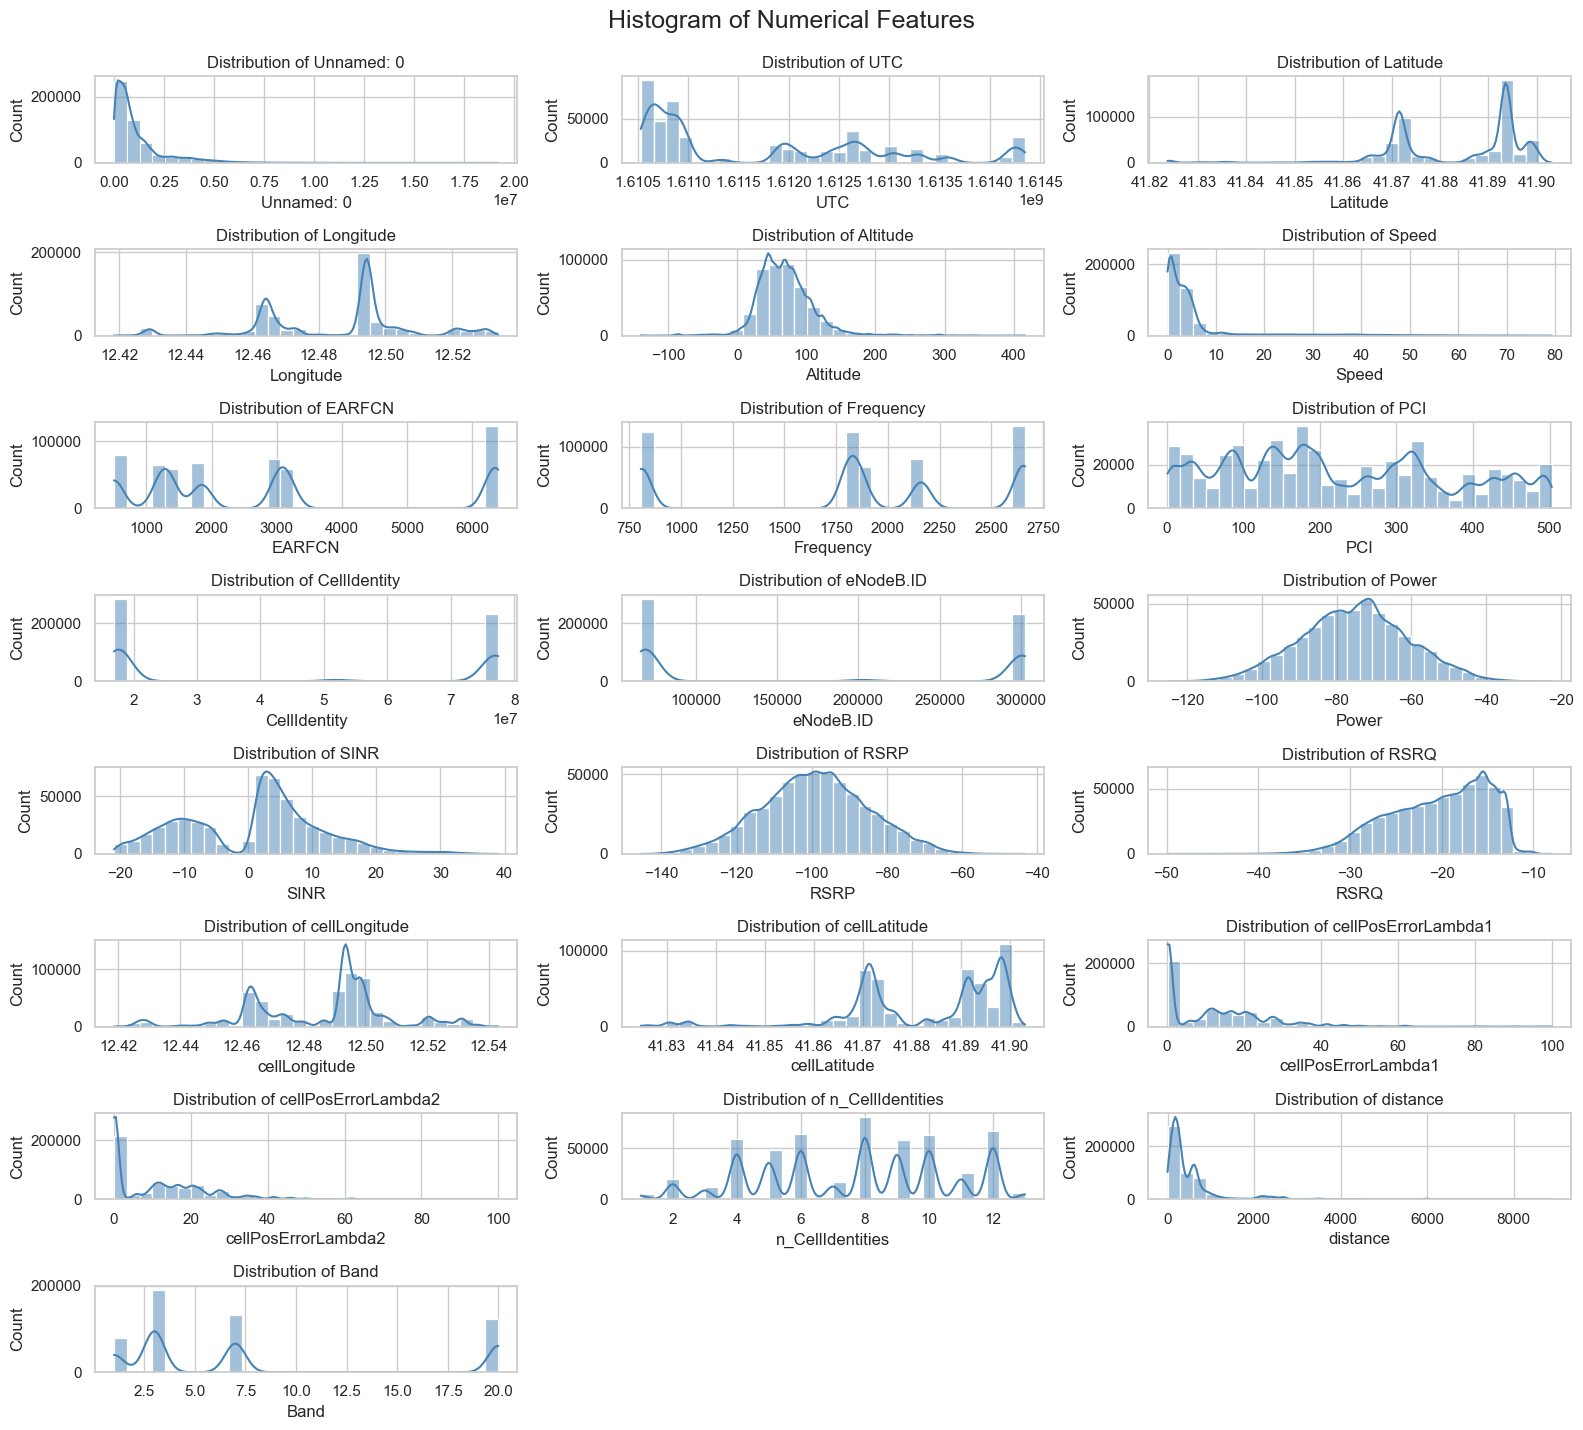

In [25]:
# Visualisation of numerical features
# Select only numerical columns
numeric_cols = df_4g.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
plt.figure(figsize=(16, 14))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i + 1)
    sns.histplot(df_4g[col].dropna(), kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()

plt.suptitle('Histogram of Numerical Features', fontsize=18, y=1.02)
plt.show()


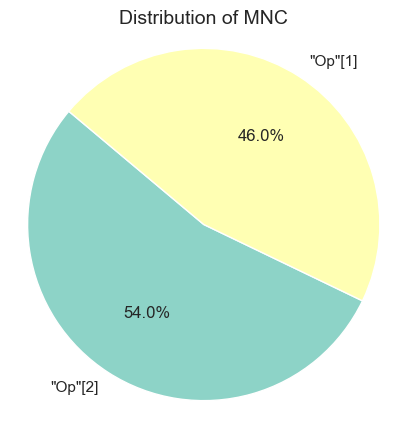

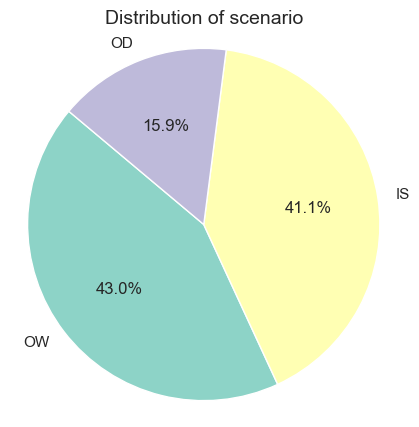

In [26]:
# Visualisation of categorical features

# Function to plot pie chart for a categorical column
def plot_pie_chart(column_name, data):
    counts = data[column_name].value_counts()
    labels = counts.index
    sizes = counts.values
    
    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
    plt.title(f'Distribution of {column_name}', fontsize=14)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plot for MNC
plot_pie_chart('MNC', df_4g)

# Plot for Scenario
plot_pie_chart('scenario', df_4g)


# 1.2 Handling missing values

In [32]:
#Check missing values
# missing values per column
missing_values=df_4g.isnull().sum()
print("Missing values per column")
missing_values

Missing values per column


Unnamed: 0                 0
Date                       0
Time                       0
UTC                    70339
Latitude                   0
Longitude                  0
Altitude               70339
Speed                  70339
EARFCN                     0
Frequency                  0
PCI                        0
MNC                        0
CellIdentity               0
eNodeB.ID                  0
Power                  21714
SINR                   21714
RSRP                       0
RSRQ                       0
scenario                   0
cellLongitude              0
cellLatitude               0
cellPosErrorLambda1     7908
cellPosErrorLambda2        0
n_CellIdentities           0
distance                   0
Band                       0
campaign                   0
dtype: int64

In [34]:
# missing values
missing_values= df_4g.isnull().sum()
print("Columns with missing values")
missing_values[missing_values > 0].sort_values(ascending=False)

Columns with missing values


UTC                    70339
Altitude               70339
Speed                  70339
Power                  21714
SINR                   21714
cellPosErrorLambda1     7908
dtype: int64

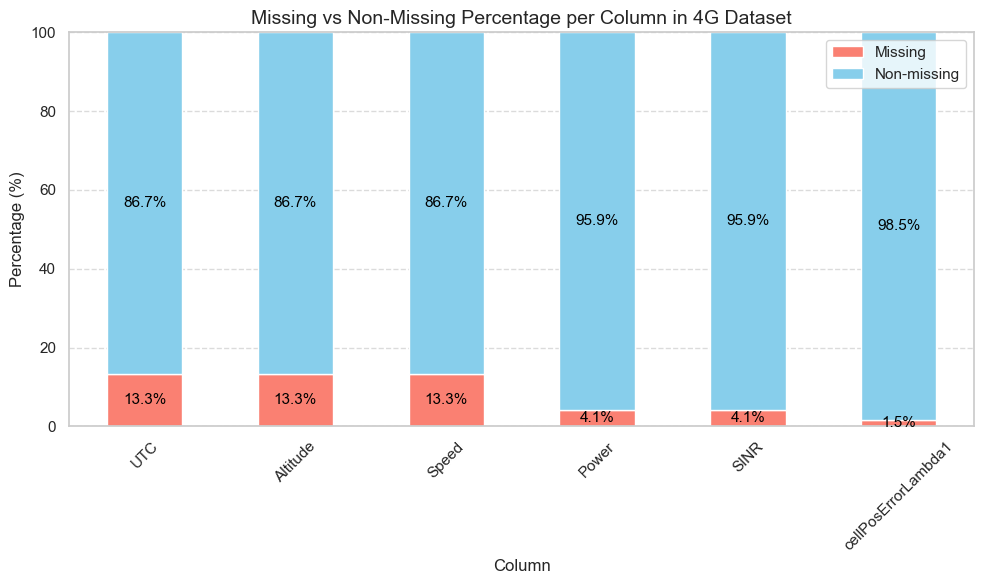

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Example 4G dataset length (replace with your actual DataFrame shape)
total_rows = len(df_4g)

# Manually provided missing counts (from your message)
missing_counts = {
    'UTC': 70339,
    'Altitude': 70339,
    'Speed': 70339,
    'Power': 21714,
    'SINR': 21714,
    'cellPosErrorLambda1': 7908
}

# Prepare data for plotting
data = []
for col, missing in missing_counts.items():
    non_missing = total_rows - missing
    missing_percent = (missing / total_rows) * 100
    non_missing_percent = (non_missing / total_rows) * 100
    
    data.append({
        'Column': col,
        'Missing': missing_percent,
        'Non-missing': non_missing_percent
    })

# Create DataFrame
missing_df = pd.DataFrame(data)
missing_df.set_index('Column', inplace=True)

# Plot: Stacked Bar Plot
plt.figure(figsize=(10, 6))
missing_df[['Missing', 'Non-missing']].plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], ax=plt.gca())

# Title and labels
plt.title('Missing vs Non-Missing Percentage per Column in 4G Dataset', fontsize=14)
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage text on each bar section
for idx, col in enumerate(missing_df.index):
    missing_val = missing_df.loc[col, 'Missing']
    non_missing_val = missing_df.loc[col, 'Non-missing']
    
    plt.text(idx, missing_val/2, f'{missing_val:.1f}%', ha='center', va='center', color='black', fontsize=11)
    plt.text(idx, missing_val + non_missing_val/2, f'{non_missing_val:.1f}%', ha='center', va='center', color='black', fontsize=11)

# Tidy up
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


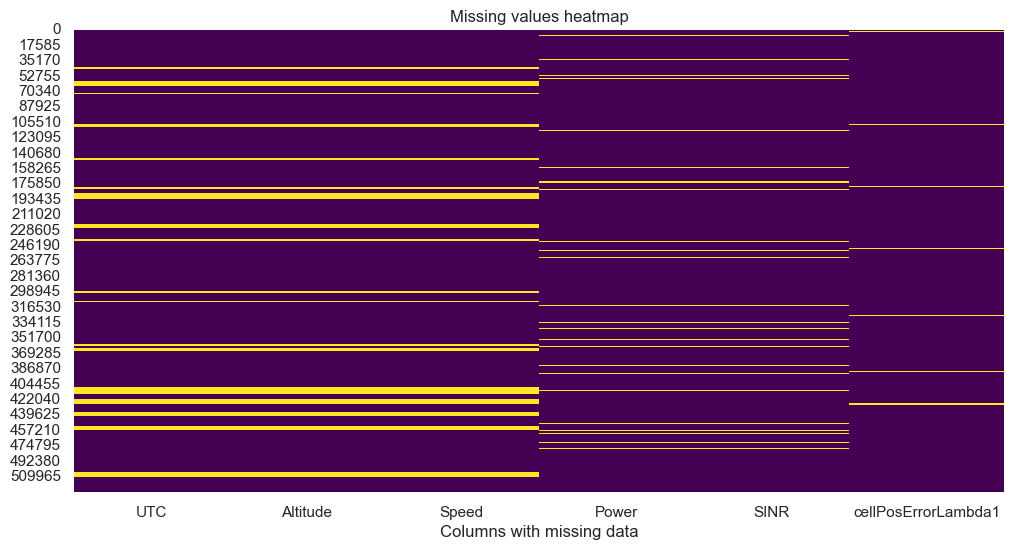

In [27]:
# visualise only columns with missing values in heatmap

# columns having missing values
missing_cols=df_4g.columns[df_4g.isnull().any()]

#setting the size of plot
plt.figure(figsize=(12,6))

#creating heatmap which visualise missing values 
sns.heatmap(df_4g[missing_cols].isnull(),cbar=False, cmap='viridis')

#setting the title , xlabel and display the plot 
plt.title("Missing values heatmap")
plt.xlabel("Columns with missing data")
plt.show()


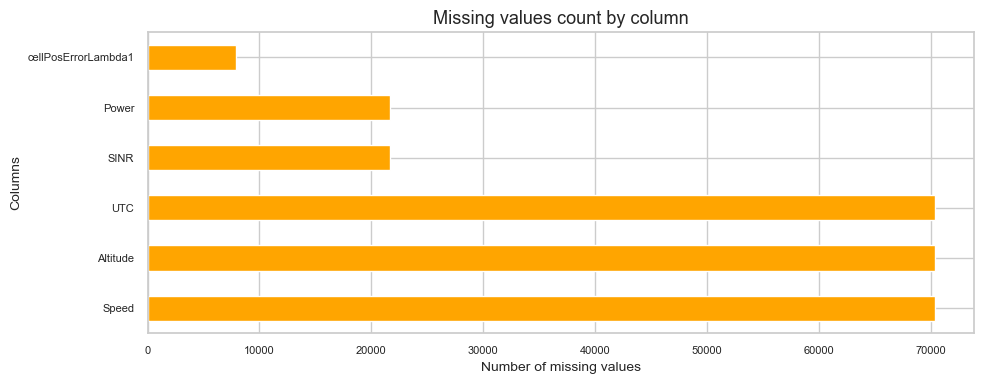

In [24]:
# Bar plot of missing values

#sorting the columns which have missing values
missing_values= df_4g.isnull().sum()
missing_values= missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

#set the size of plot
plt.figure(figsize=(10,4))

#creating bar plot to visualise missing values
missing_values.plot(kind='barh',color='orange')

# setting title, xlabel, ylabel and the font sizes of plot
plt.title("Missing values count by column", fontsize=13)
plt.xlabel("Number of missing values",fontsize=10)
plt.ylabel("Columns",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [36]:
# Handling missing values

#splitting features based on the data types
#numerical features
numeric_cols_4g = df_4g.select_dtypes(include=['number','float']).columns.tolist()
print("Numerical columns: \n",numeric_cols_4g)

#categorical features
categorical_cols_4g = df_4g.select_dtypes(include=['object']).columns.tolist()
print("\n Categorical columns: \n",categorical_cols_4g)

Numerical columns: 
 ['Unnamed: 0', 'UTC', 'Latitude', 'Longitude', 'Altitude', 'Speed', 'EARFCN', 'Frequency', 'PCI', 'CellIdentity', 'eNodeB.ID', 'Power', 'SINR', 'RSRP', 'RSRQ', 'cellLongitude', 'cellLatitude', 'cellPosErrorLambda1', 'cellPosErrorLambda2', 'n_CellIdentities', 'distance', 'Band']

 Categorical columns: 
 ['Date', 'Time', 'MNC', 'scenario', 'campaign']


In [38]:
#Check for duplicate records
print("Duplicate rows:  ",df_4g.duplicated().sum())

Duplicate rows:   0


In [40]:
# Imputation of numerical features
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy='mean')
df_4g[numeric_cols_4g] = numerical_imputer.fit_transform(df_4g[numeric_cols_4g])
print("Missing values handled in numerical columns")

Missing values handled in numerical columns


In [42]:
# Imputation of categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_4g[categorical_cols_4g] = categorical_imputer.fit_transform(df_4g[categorical_cols_4g])
print("Missing values handled in categorical columns")

Missing values handled in categorical columns


In [44]:
# removing the rows having null values
df_4g = df_4g.dropna(how='all')
print("Removed the rows which have all missing values")

Removed the rows which have all missing values


In [52]:
#cheching null values after handling data
print("Null values after data cleaning:\n ", df_4g.isnull().sum())

Null values after data cleaning:
  Unnamed: 0             0
Date                   0
Time                   0
UTC                    0
Latitude               0
Longitude              0
Altitude               0
Speed                  0
EARFCN                 0
Frequency              0
PCI                    0
MNC                    0
CellIdentity           0
eNodeB.ID              0
Power                  0
SINR                   0
RSRP                   0
RSRQ                   0
scenario               0
cellLongitude          0
cellLatitude           0
cellPosErrorLambda1    0
cellPosErrorLambda2    0
n_CellIdentities       0
distance               0
Band                   0
campaign               0
dtype: int64


# 1.3 Outlier Detection


In [54]:
# Before outlier detection

# Select numerical columns  
numeric_cols = df_4g.select_dtypes(include=np.number).columns.tolist()

# Exclude IDs/timestamps
exclude_cols = ['UTC']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Outlier detection using IQR (existing)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

# Create a summary table
summary = []

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df_4g, col)
    outlier_count = len(outliers)
    total_count = df_4g.shape[0]
    outlier_percentage = (outlier_count / total_count) * 100
    
    summary.append({
        'Feature': col,
        'Outlier Count': outlier_count,
        'Total Values': total_count,
        'Outlier %': round(outlier_percentage, 2)
    })

# Convert to DataFrame for display
outlier_summary_df = pd.DataFrame(summary)

# Show the summary table
print(outlier_summary_df)


                Feature  Outlier Count  Total Values  Outlier %
0            Unnamed: 0          50215        527540       9.52
1              Latitude          10228        527540       1.94
2             Longitude            258        527540       0.05
3              Altitude          22505        527540       4.27
4                 Speed          44584        527540       8.45
5                EARFCN         122907        527540      23.30
6             Frequency              0        527540       0.00
7                   PCI              0        527540       0.00
8          CellIdentity              0        527540       0.00
9             eNodeB.ID              0        527540       0.00
10                Power           3579        527540       0.68
11                 SINR           3288        527540       0.62
12                 RSRP           2136        527540       0.40
13                 RSRQ            975        527540       0.18
14        cellLongitude            236  


 Checking for outliers in: Unnamed: 0
 - Outliers detected: 50215


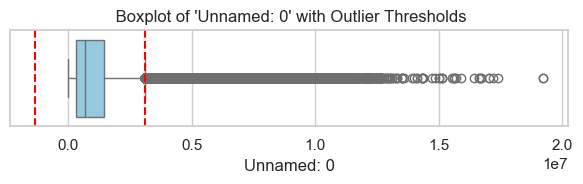

 After capping outliers in Unnamed: 0:


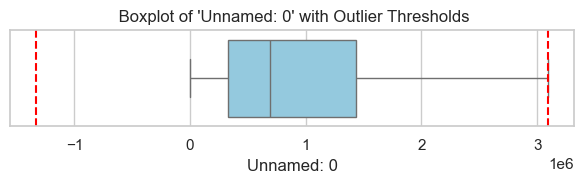


 Checking for outliers in: Latitude
 - Outliers detected: 10228


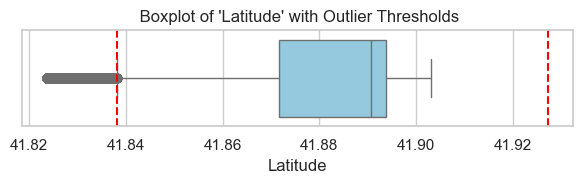

 After capping outliers in Latitude:


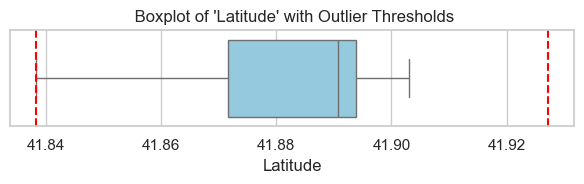


 Checking for outliers in: Longitude
 - Outliers detected: 258


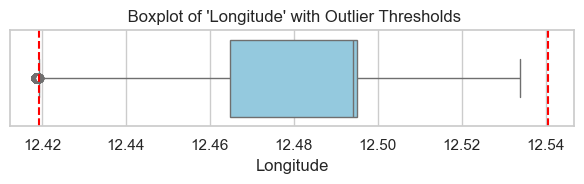

 After capping outliers in Longitude:


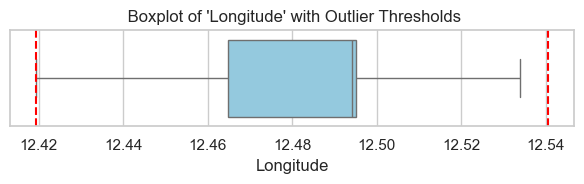


 Checking for outliers in: Altitude
 - Outliers detected: 22505


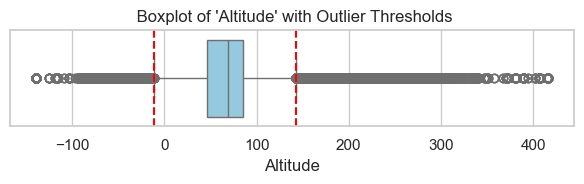

 After capping outliers in Altitude:


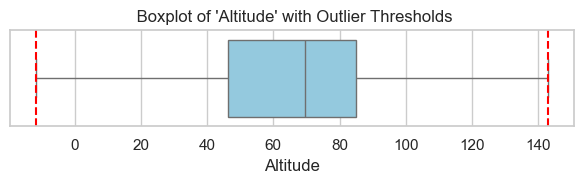


 Checking for outliers in: Speed
 - Outliers detected: 44584


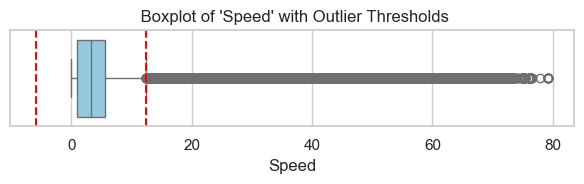

 After capping outliers in Speed:


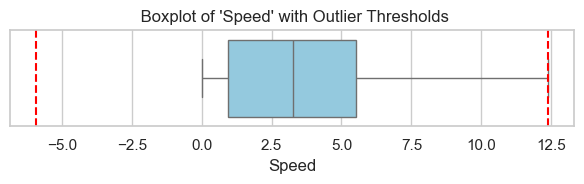


 Checking for outliers in: EARFCN
 - Outliers detected: 122907


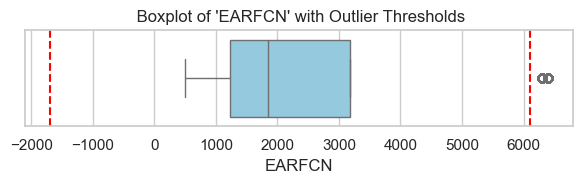

 After capping outliers in EARFCN:


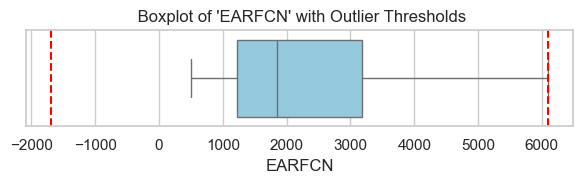


 Checking for outliers in: Frequency
 - Outliers detected: 0


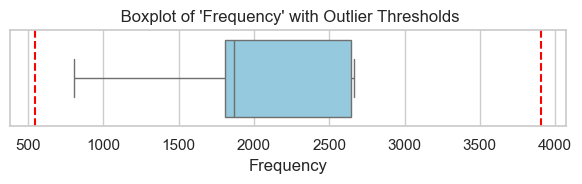

 After capping outliers in Frequency:


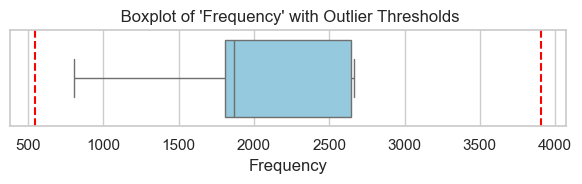


 Checking for outliers in: PCI
 - Outliers detected: 0


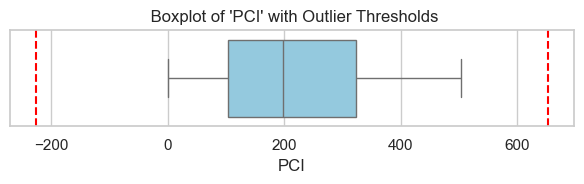

 After capping outliers in PCI:


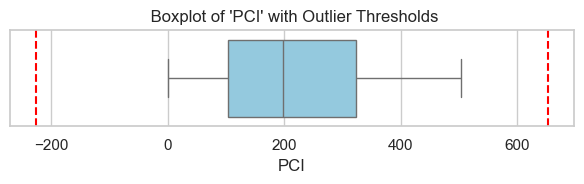


 Checking for outliers in: CellIdentity
 - Outliers detected: 0


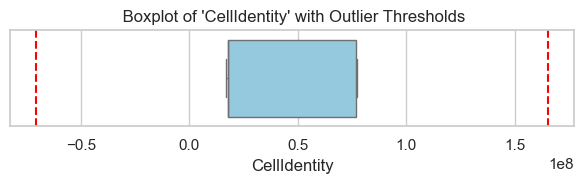

 After capping outliers in CellIdentity:


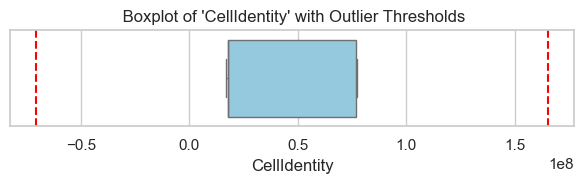


 Checking for outliers in: eNodeB.ID
 - Outliers detected: 0


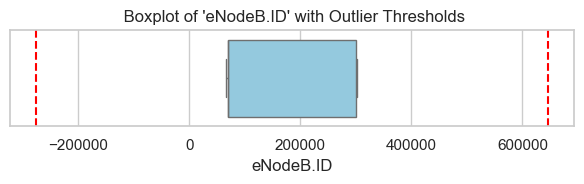

 After capping outliers in eNodeB.ID:


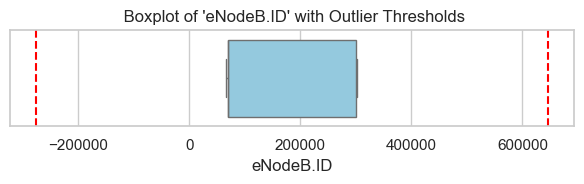


 Checking for outliers in: Power
 - Outliers detected: 3579


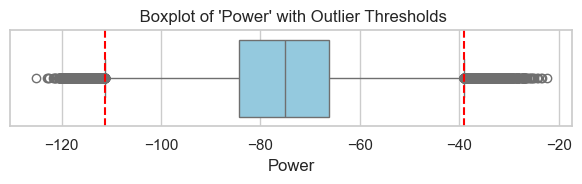

 After capping outliers in Power:


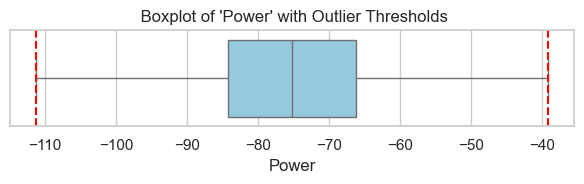


 Checking for outliers in: SINR
 - Outliers detected: 3288


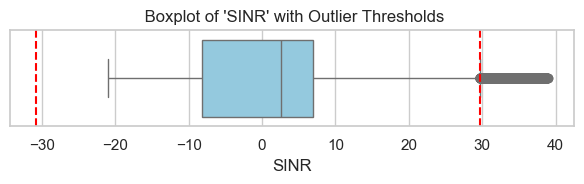

 After capping outliers in SINR:


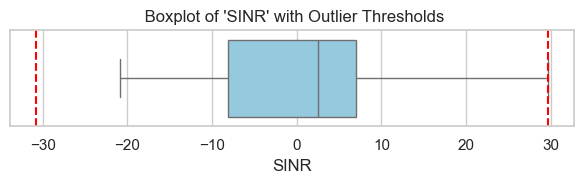


 Checking for outliers in: RSRP
 - Outliers detected: 2136


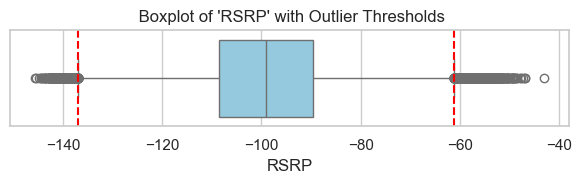

 After capping outliers in RSRP:


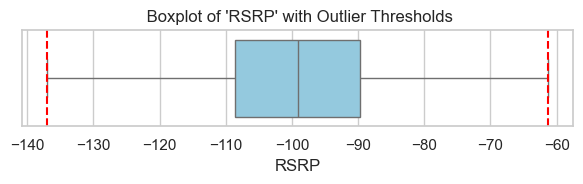


 Checking for outliers in: RSRQ
 - Outliers detected: 975


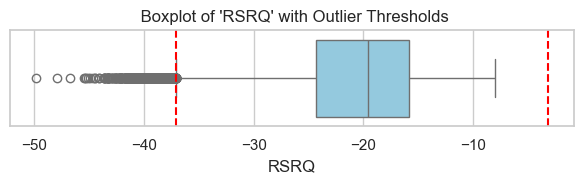

 After capping outliers in RSRQ:


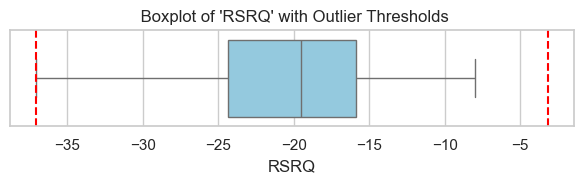


 Checking for outliers in: cellLongitude
 - Outliers detected: 236


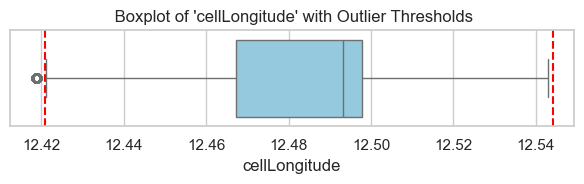

 After capping outliers in cellLongitude:


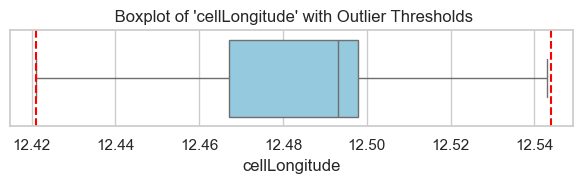


 Checking for outliers in: cellLatitude
 - Outliers detected: 8960


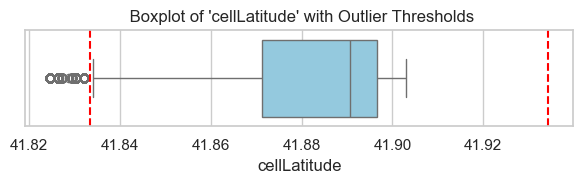

 After capping outliers in cellLatitude:


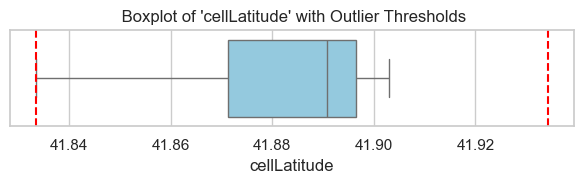


 Checking for outliers in: cellPosErrorLambda1
 - Outliers detected: 8308


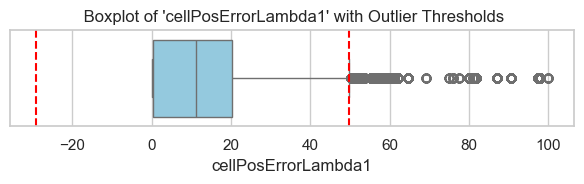

 After capping outliers in cellPosErrorLambda1:


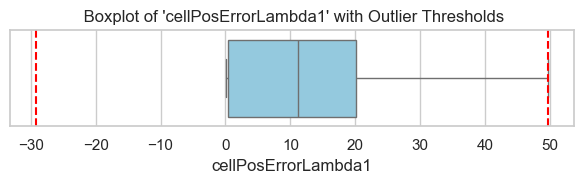


 Checking for outliers in: cellPosErrorLambda2
 - Outliers detected: 8308


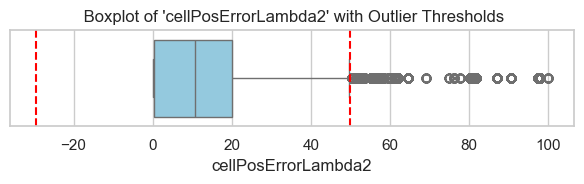

 After capping outliers in cellPosErrorLambda2:


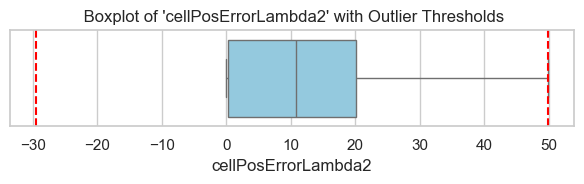


 Checking for outliers in: n_CellIdentities
 - Outliers detected: 0


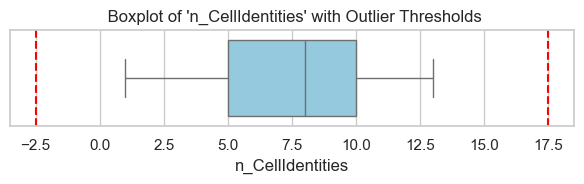

 After capping outliers in n_CellIdentities:


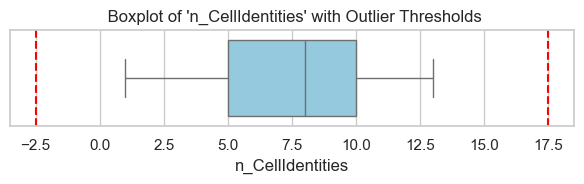


 Checking for outliers in: distance
 - Outliers detected: 44952


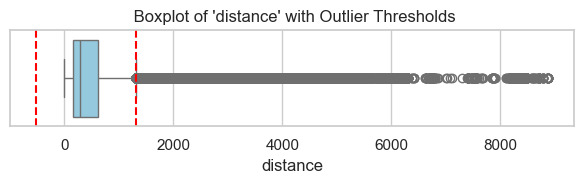

 After capping outliers in distance:


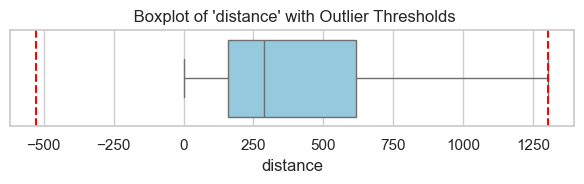


 Checking for outliers in: Band
 - Outliers detected: 122907


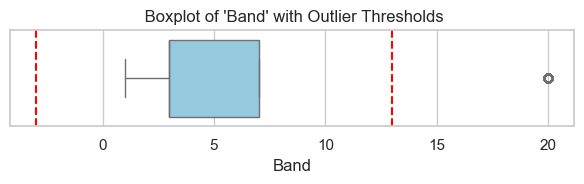

 After capping outliers in Band:


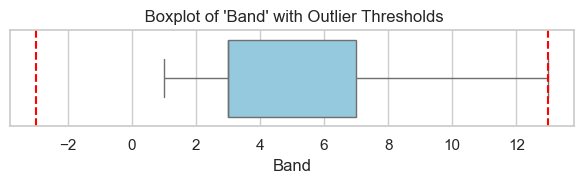

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#  Select numerical columns  
numeric_cols = df_4g.select_dtypes(include=np.number).columns.tolist()

# Exclude IDs/timestamps
exclude_cols = ['UTC']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

#  Outlier detection using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

#  Visualize original data with outliers
def plot_feature_outliers(df, column, lower, upper):
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[column], color='skyblue')
    plt.axvline(x=lower, color='red', linestyle='--')
    plt.axvline(x=upper, color='red', linestyle='--')
    plt.title(f" Boxplot of '{column}' with Outlier Thresholds")
    plt.tight_layout()
    plt.show()

#  Treat outliers by capping
def cap_outliers(df, column, lower, upper):
    df[column] = np.where(df[column] < lower, lower,
                 np.where(df[column] > upper, upper, df[column]))

# Apply to all numerical columns
for col in numeric_cols:
    print(f"\n Checking for outliers in: {col}")
    outliers, lower, upper = detect_outliers_iqr(df_4g, col)
    print(f" - Outliers detected: {len(outliers)}")
    
    # Visualize before treatment
    plot_feature_outliers(df_4g, col, lower, upper)
    
    # Treat outliers
    cap_outliers(df_4g, col, lower, upper)

    #  Visualize after treatment
    print(f" After capping outliers in {col}:")
    plot_feature_outliers(df_4g, col, lower, upper)


# 1.4 Skewness Transformation


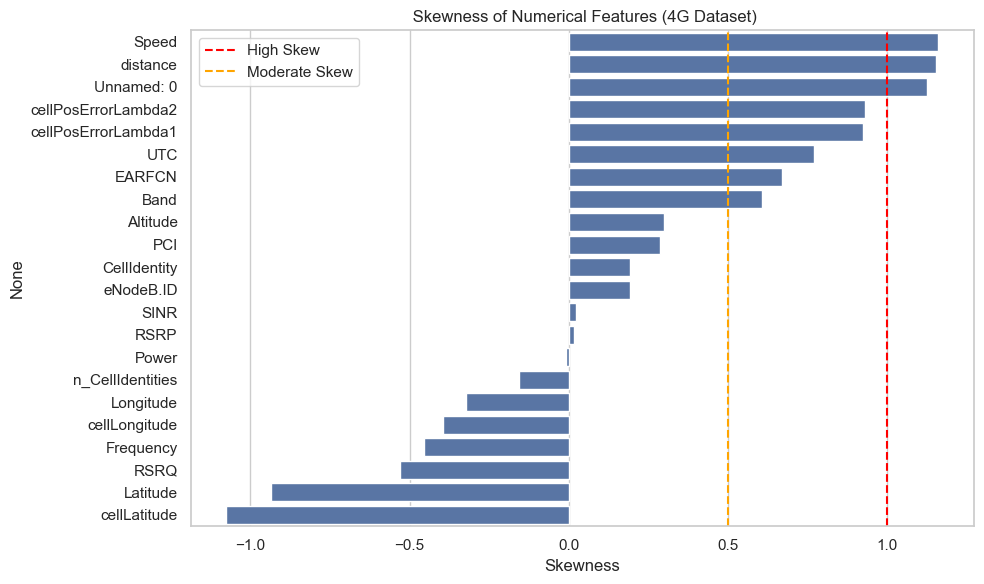

In [58]:
# Check skewness in numerical features
numeric_cols_4g = df_4g.select_dtypes(include=np.number).columns

skewness = df_4g[numeric_cols_4g].skew().sort_values(ascending=False)
skew_df = skewness.to_frame(name='Skewness')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=skew_df['Skewness'], y=skew_df.index)
plt.axvline(x=1, color='red', linestyle='--', label='High Skew')
plt.axvline(x=0.5, color='orange', linestyle='--', label='Moderate Skew')
plt.title(' Skewness of Numerical Features (4G Dataset)')
plt.legend()
plt.tight_layout()
plt.show()


In [60]:
from sklearn.preprocessing import PowerTransformer

# List of highly skewed features 
skewed_features = ['distance', 'Speed', 'cellPosErrorLambda1', 'cellPosErrorLambda2']

# Check if any negative or zero values exist
for col in skewed_features:
    print(f"{col}: min = {df_4g[col].min()}")

# Split into log-transformable and power-transformable
log_transformable = [col for col in skewed_features if df_4g[col].min() >= 0]
power_transformable = [col for col in skewed_features if df_4g[col].min() < 0]

# Log transform (for positive values only)
for col in log_transformable:
    df_4g[col] = np.log1p(df_4g[col])

# Power transform (Yeo-Johnson handles negatives)
if power_transformable:
    pt = PowerTransformer(method='yeo-johnson')
    df_4g[power_transformable] = pt.fit_transform(df_4g[power_transformable])

# Re-check skewness after transformation
print("\nSkewness after transformation:")
print(df_4g[skewed_features].skew())


distance: min = 0.0
Speed: min = 0.0
cellPosErrorLambda1: min = 0.139538
cellPosErrorLambda2: min = 0.0

Skewness after transformation:
distance              -0.709417
Speed                 -0.120710
cellPosErrorLambda1   -0.240533
cellPosErrorLambda2   -0.179615
dtype: float64


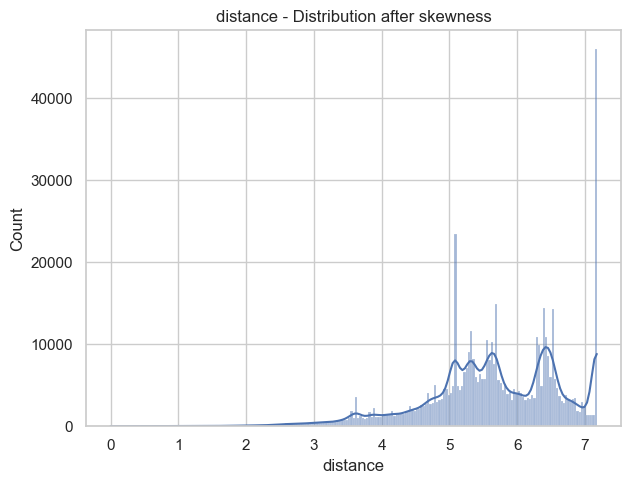

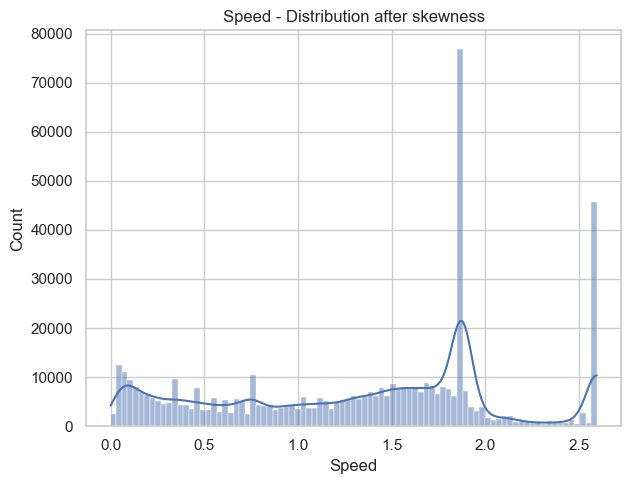

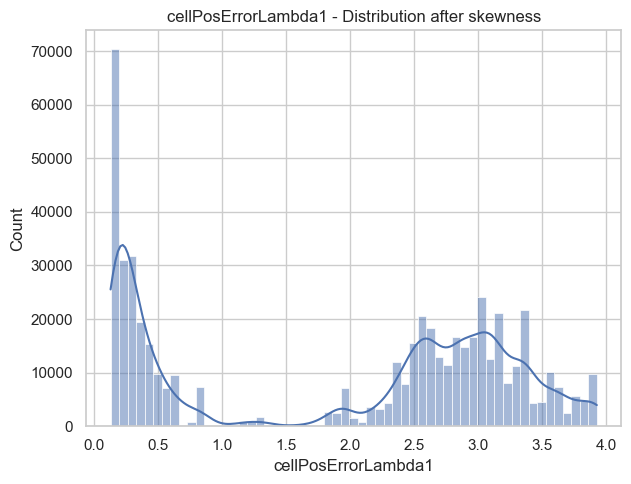

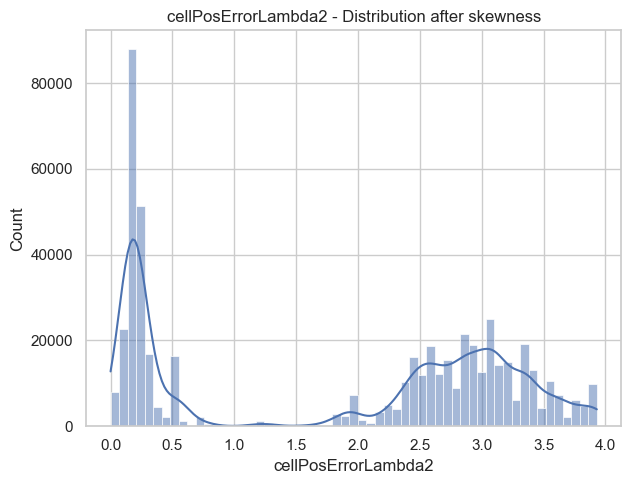

In [73]:
# visualisation of skewness after transformation
for col in skewed_features:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_4g[col], kde=True)
    plt.title(f"{col} - Distribution after skewness")

    plt.tight_layout()
    plt.show()


distance: min = -5.5382397434954855
Speed: min = -1.7477866380897764
cellPosErrorLambda1: min = -1.340972557096675
cellPosErrorLambda2: min = -1.3259676814449768


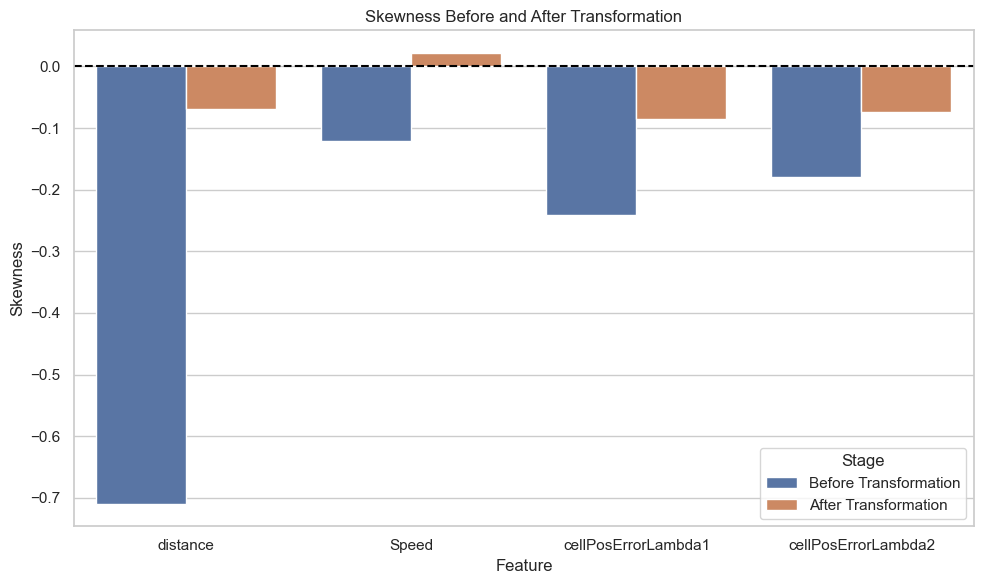

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Sample skewed features
skewed_features = ['distance', 'Speed', 'cellPosErrorLambda1', 'cellPosErrorLambda2']

# Check for negative/zero values
for col in skewed_features:
    print(f"{col}: min = {df_4g[col].min()}")

# Calculate skewness before transformation
skew_before = df_4g[skewed_features].skew()

# Split into log-transformable and power-transformable
log_transformable = [col for col in skewed_features if df_4g[col].min() >= 0]
power_transformable = [col for col in skewed_features if df_4g[col].min() < 0]

# Apply transformations
df_4g_transformed = df_4g.copy()

# Log transform (for positive values only)
for col in log_transformable:
    df_4g_transformed[col] = np.log1p(df_4g_transformed[col])

# Power transform (Yeo-Johnson for negatives)
if power_transformable:
    pt = PowerTransformer(method='yeo-johnson')
    df_4g_transformed[power_transformable] = pt.fit_transform(df_4g_transformed[power_transformable])

# Calculate skewness after transformation
skew_after = df_4g_transformed[skewed_features].skew()

# Combine into a dataframe for visualization
skew_df = pd.DataFrame({
    'Feature': skewed_features,
    'Before Transformation': skew_before.values,
    'After Transformation': skew_after.values
})

# Melt for easy plotting
skew_df_melted = skew_df.melt(id_vars='Feature', var_name='Stage', value_name='Skewness')

# Plot the comparison barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=skew_df_melted, x='Feature', y='Skewness', hue='Stage')
plt.title('Skewness Before and After Transformation')
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


# 1.5 Correlation Matrix Analysis

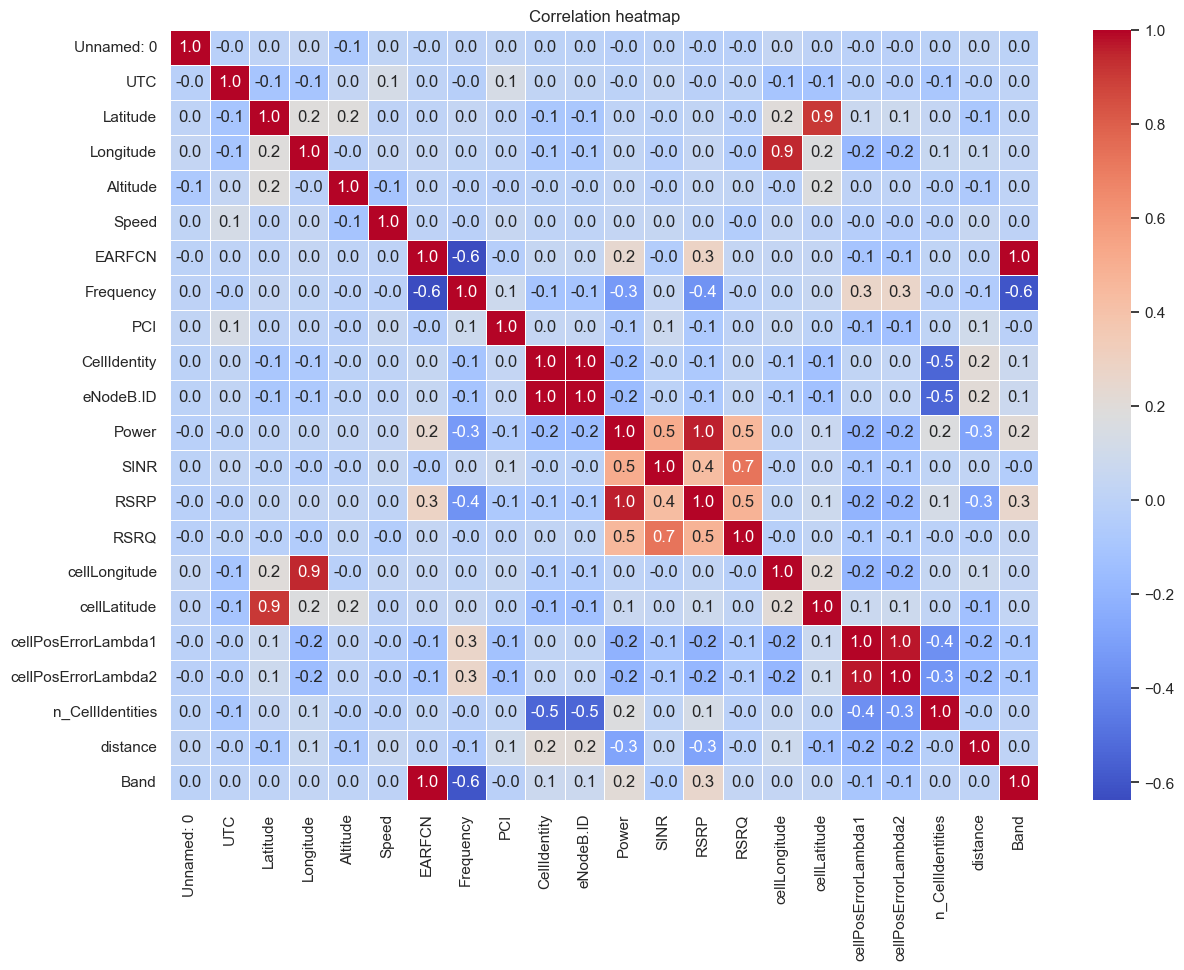

In [64]:
#Correlation matrix for numeric features
num_df_4g =df_4g.select_dtypes(include=[np.number])
plt.figure(figsize=(14,10))
sns.heatmap(num_df_4g.corr(), cmap='coolwarm', annot= True, fmt='.1f', linewidth=0.5)
plt.title("Correlation heatmap")
plt.show()

Text(0.5, 55.249999999999986, 'Correlation Strength with SINR')

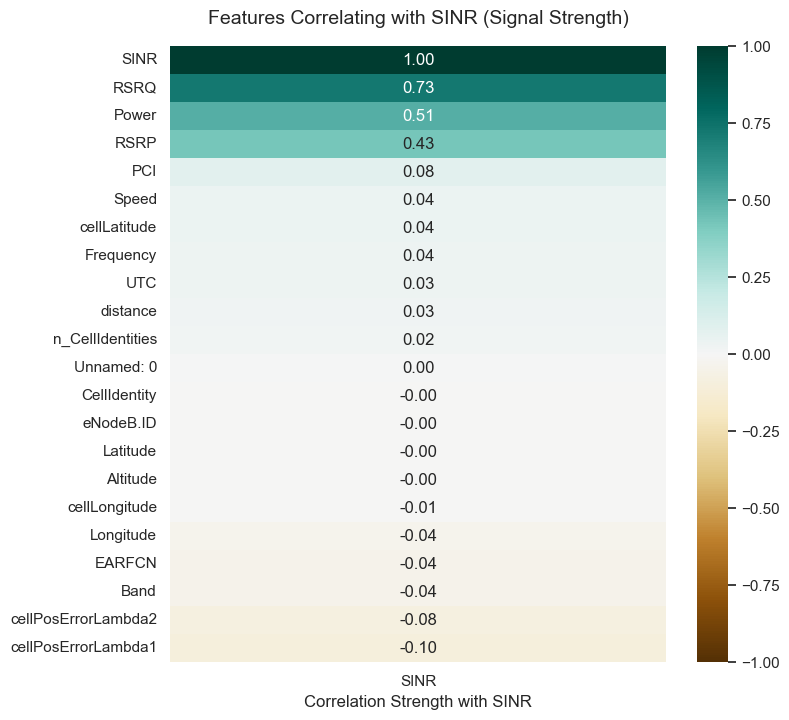

In [66]:
#Plot heatmap for SINR 
plt.figure(figsize=(8, 8))

# Calculate correlations with SINR
corr_with_rsrp = num_df_4g.corr()[['SINR']].sort_values(by='SINR', ascending=False)
heatmap = sns.heatmap(corr_with_rsrp,  vmin=-1, vmax=1, annot=True, cmap='BrBG', fmt=".2f")

# Set  title and xlabel
heatmap.set_title(  'Features Correlating with SINR (Signal Strength)',  fontdict={'fontsize': 14},  pad=16 )
plt.xlabel('Correlation Strength with SINR')

Text(0.5, 55.249999999999986, 'Correlation Strength with RSRP')

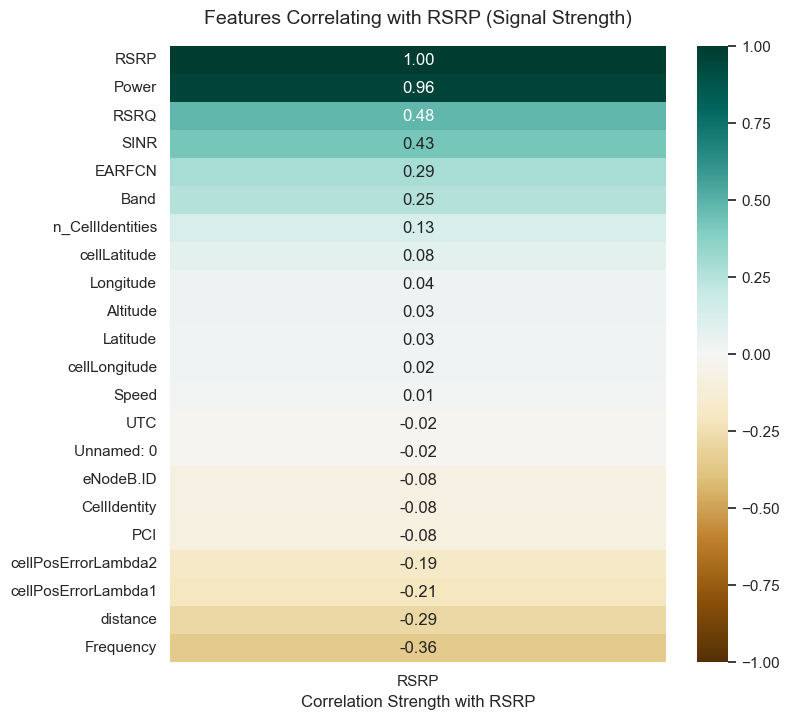

In [78]:
#Plot heatmap for RSRP 
plt.figure(figsize=(8, 8))

# Calculate correlations with RSRP
corr_with_rsrp = num_df_4g.corr()[['RSRP']].sort_values(by='RSRP', ascending=False)
heatmap = sns.heatmap(corr_with_rsrp,  vmin=-1, vmax=1, annot=True, cmap='BrBG', fmt=".2f")

# Set  title and xlabel
heatmap.set_title(  'Features Correlating with RSRP (Signal Strength)',  fontdict={'fontsize': 14},  pad=16 )
plt.xlabel('Correlation Strength with RSRP')

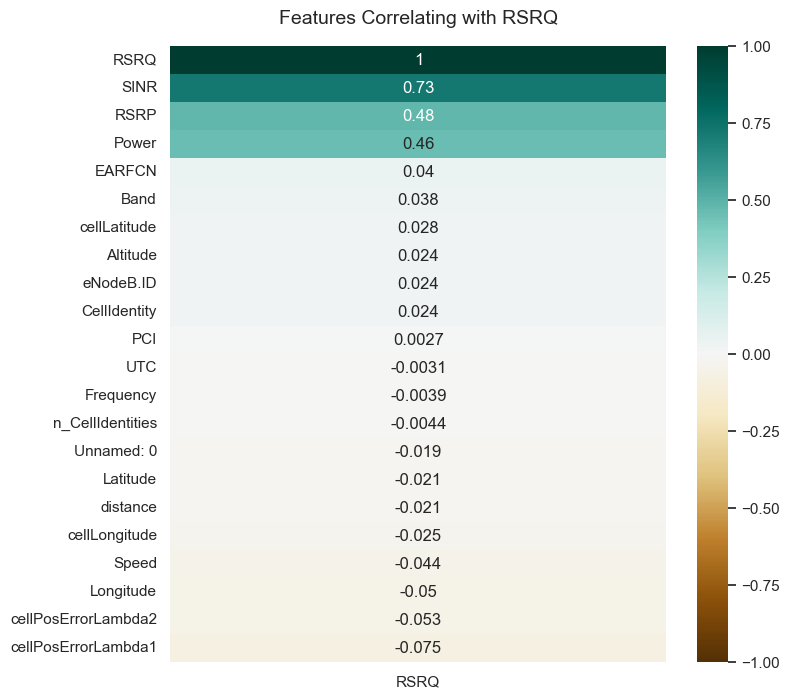

In [82]:
#plot heatmap for RSRQ
plt.figure(figsize=(8, 8))

#creating heatmap
heatmap = sns.heatmap(num_df_4g.corr()[['RSRQ']].sort_values(by='RSRQ', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with RSRQ', fontdict={'fontsize':14}, pad=16);

In [68]:
# Select upper triangle of correlation matrix
num_df_4g =df_4g.select_dtypes(include=[np.number])
corr_matrix = num_df_4g.corr(method='pearson')

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.8
high_corr_pairs = [(col, row, corr_matrix.loc[row, col])
                   for col in upper.columns
                   for row in upper.index
                   if abs(upper.loc[row, col]) > 0.8]

# Show as DataFrame
pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])


Feature 1            Feature 2  Correlation
0            eNodeB.ID         CellIdentity     1.000000
1                 RSRP                Power     0.958002
2        cellLongitude            Longitude     0.943405
3         cellLatitude             Latitude     0.905782
4  cellPosErrorLambda2  cellPosErrorLambda1     0.972345
5                 Band               EARFCN     0.995152

# 1.6 Encoding and scaling

In [70]:
# Encoding categorical variables
#import library
from sklearn.preprocessing import LabelEncoder
for col in ['MNC', 'scenario','campaign']:
    label_encode=LabelEncoder()
    df_4g[col]=label_encode.fit_transform(df_4g[col])
print("Categorical features encoded")

Categorical features encoded


In [72]:
#Normalise numerical features
#import library
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df_4g[numeric_cols_4g]=scaler.fit_transform(df_4g[numeric_cols_4g])
print("Numerical features are normalised using Standard Scaler")

Numerical features are normalised using Standard Scaler


In [74]:
# Converting Date and Time columns
# Converting 'Date' to datetime format (safe parsing, ignore errors)
df_4g['Date'] = pd.to_datetime(df_4g['Date'],format= '%d.%m.%Y', errors='coerce')

# Converting 'Time' to datetime format, extracting time only
df_4g['Time'] = pd.to_datetime(df_4g['Time'], format='%H:%M:%S.%f', errors='coerce')

# Extracting useful features from Date and Time
# Extract day of the week (0=Monday, 6=Sunday)
df_4g['Weekday'] = df_4g['Date'].dt.weekday

# Extract day of the month
df_4g['Day'] = df_4g['Date'].dt.day

# Extract month (optional)
df_4g['Month'] = df_4g['Date'].dt.month

# Extract hour from Time
df_4g['Hour'] = df_4g['Time'].dt.hour

# Dropping original Date/Time columns 
df_4g.drop(['Date', 'Time'], axis=1, inplace=True)

# Final Check
print(df_4g[['Weekday', 'Day', 'Month','Hour']].head())

   Weekday  Day  Month  Hour
0        3   14      1     9
1        3   14      1     9
2        3   14      1     9
3        3   14      1     9
4        3   14      1     9


In [76]:
# preview of cleaned data
print("Cleaned dataset preview")
df_4g.head()

Cleaned dataset preview


Unnamed: 0       UTC  Latitude  Longitude  Altitude     Speed    EARFCN  \
0   -0.848479  1.400079  0.961729   0.955652 -0.467087  0.401867  1.638076   
1   -0.837562  1.400079  0.961729   0.955652 -0.467087  0.401867  1.638076   
2   -0.784309  1.400080  0.961656   0.954982 -0.429066  0.412407 -0.731453   
3   -0.303081  1.400086  0.964423   0.951494 -0.430024  0.401867  0.104118   
4   -0.260304  1.400086  0.964423   0.951494 -0.430024  0.401867  1.638076   

   Frequency       PCI  MNC  CellIdentity  eNodeB.ID     Power      SINR  \
0  -1.595929  1.309878    0      1.110206   1.110207  1.503041  0.562772   
1  -1.595929  1.302903    0      1.110206   1.110207  1.629657  0.415990   
2  -0.049422  0.333407    0      1.110206   1.110207  2.351726  2.180267   
3   1.212643  0.291559    1     -0.915165  -0.915165  1.004538  1.085199   
4  -1.595929  1.309878    0      1.110206   1.110207  1.906040  0.054830   

       RSRP      RSRQ  scenario  cellLongitude  cellLatitude  \
0  1.447484  0.182877         2       0.803670      0.458299   
1  1.670337  0.767751         2       0.803670      0.458299   
2  2.495745  1.283926         2       0.803670      0.458299   
3  0.920160  1.083398         2       0.931781      0.883038   
4  1.977647  0.554226         2       0.803670      0.458299   

   cellPosErrorLambda1  cellPosErrorLambda2  n_CellIdentities  distance  \
0             0.403404             0.443043         -0.564976  0.962310   
1             0.403404             0.443043         -0.564976  0.962310   
2            -0.521046            -0.886791         -0.564976  0.961644   
3             0.516188             0.551326         -0.564976 -2.466163   
4             0.403404             0.443043         -0.564976  0.964103   

       Band  campaign  Weekday  Day  Month  Hour  
0  1.608995       153        3   14      1     9  
1  1.608995       153        3   14      1     9  
2 -0.701522       153        3   14      1     9  
3  0.222685       153        3   14      1     9  
4  1.608995       153        3   14      1     9

In [112]:
# shape and summary of cleaned data
print("Shape of 4G dataset after cleaning:\n", df_4g.shape)
print("Summary after cleaning\n")
df_4g.describe()

Shape of 4G dataset after cleaning:
 (527540, 29)
Summary after cleaning



Unnamed: 0           UTC      Latitude     Longitude      Altitude  \
count  5.275400e+05  5.275400e+05  5.275400e+05  5.275400e+05  5.275400e+05   
mean   1.174495e-17  5.237603e-15 -5.194950e-13  2.468207e-13  7.792615e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.095638e+00 -1.105021e+00 -3.299116e+00 -2.979922e+00 -2.557295e+00   
25%   -7.455608e-01 -9.188946e-01 -8.675691e-01 -9.448137e-01 -7.025629e-01   
50%   -3.605632e-01  0.000000e+00  5.249198e-01  3.638613e-01  3.804010e-02   
75%    4.392712e-01  7.763807e-01  7.534624e-01  4.119253e-01  5.339254e-01   
max    2.216519e+00  2.363531e+00  1.426280e+00  2.143079e+00  2.388658e+00   

              Speed        EARFCN     Frequency           PCI            MNC  \
count  5.275400e+05  5.275400e+05  5.275400e+05  5.275400e+05  527540.000000   
mean   1.137860e-16  3.173292e-17  1.942766e-16 -2.198138e-17       0.539751   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00       0.498418   
min   -1.747787e+00 -1.154975e+00 -1.595929e+00 -1.556761e+00       0.000000   
25%   -8.659421e-01 -7.938087e-01 -6.848675e-02 -8.453321e-01       0.000000   
50%    1.870010e-01 -4.820286e-01  2.683540e-02 -1.827271e-01       1.000000   
75%    7.477813e-01  1.789452e-01  1.212643e+00  6.891216e-01       1.000000   
max    1.705547e+00  1.638076e+00  1.235520e+00  1.944584e+00       1.000000   

       CellIdentity     eNodeB.ID         Power          SINR          RSRP  \
count  5.275400e+05  5.275400e+05  5.275400e+05  5.275400e+05  5.275400e+05   
mean   2.025735e-17 -4.525578e-17 -3.075238e-15 -2.171200e-17 -6.689236e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -9.417197e-01 -9.417188e-01 -2.616300e+00 -2.105371e+00 -2.688069e+00   
25%   -9.143243e-01 -9.143242e-01 -6.573794e-01 -8.693149e-01 -6.738765e-01   
50%   -9.126680e-01 -9.126679e-01  9.680604e-05  1.600881e-01 -1.769216e-03   
75%    1.109681e+00  1.109681e+00  6.485681e-01  5.927077e-01  6.689186e-01   
max    1.130441e+00  1.130442e+00  2.607489e+00  2.785742e+00  2.683111e+00   

               RSRQ       scenario  cellLongitude  cellLatitude  \
count  5.275400e+05  527540.000000   5.275400e+05  5.275400e+05   
mean   7.046972e-16       1.019363   1.605692e-13  5.807429e-13   
std    1.000001e+00       0.916708   1.000001e+00  1.000001e+00   
min   -3.100774e+00       0.000000  -2.918252e+00 -3.173919e+00   
25%   -7.362111e-01       0.000000  -8.557437e-01 -7.569103e-01   
50%    1.568825e-01       1.000000   3.066365e-01  4.831412e-01   
75%    8.401641e-01       2.000000   5.192616e-01  8.544287e-01   
max    2.303278e+00       2.000000   2.535760e+00  1.269142e+00   

       cellPosErrorLambda1  cellPosErrorLambda2  n_CellIdentities  \
count         5.275400e+05         5.275400e+05      5.275400e+05   
mean         -4.988911e-17        -2.373774e-16     -1.336123e-17   
std           1.000001e+00         1.000001e+00      1.000001e+00   
min          -1.340973e+00        -1.325968e+00     -2.250342e+00   
25%          -1.196436e+00        -1.166857e+00     -9.020493e-01   
50%           4.369493e-01         4.553656e-01      1.091702e-01   
75%           8.534125e-01         8.750935e-01      7.833166e-01   
max           1.511923e+00         1.510188e+00      1.794536e+00   

           distance          Band       campaign        Weekday  \
count  5.275400e+05  5.275400e+05  527540.000000  527540.000000   
mean   5.704384e-16  3.536955e-17      98.697706       2.051549   
std    1.000001e+00  1.000001e+00      52.235394       1.859105   
min   -5.538240e+00 -1.163626e+00       0.000000       0.000000   
25%   -5.657393e-01 -7.015222e-01      55.000000       0.000000   
50%    1.156420e-02 -7.015222e-01     100.000000       2.000000   
75%    7.613930e-01  2.226845e-01     142.000000       3.000000   
max    1.494575e+00  1.608995e+00     192.000000       6.000000   

                 Day          Mont

In [114]:
# viewing data types after cleaning
df_4g.dtypes

Unnamed: 0             float64
UTC                    float64
Latitude               float64
Longitude              float64
Altitude               float64
Speed                  float64
EARFCN                 float64
Frequency              float64
PCI                    float64
MNC                      int32
CellIdentity           float64
eNodeB.ID              float64
Power                  float64
SINR                   float64
RSRP                   float64
RSRQ                   float64
scenario                 int32
cellLongitude          float64
cellLatitude           float64
cellPosErrorLambda1    float64
cellPosErrorLambda2    float64
n_CellIdentities       float64
distance               float64
Band                   float64
campaign                 int32
Weekday                  int32
Day                      int32
Month                    int32
Hour                     int32
dtype: object

# Task 2: Clustering Analysis

## KMeans Clustering

In [111]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

# Importing libraries
from sklearn.cluster import KMeans

# selecting features for clustering
features= ['SINR','RSRP','RSRQ','Speed', 'distance','Hour']
X = df_4g[features]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=42) # cluster initialisation
kmeans_labels = kmeans.fit_predict(X)   
df_4g['KMeans_Clusters'] = kmeans_labels  # store cluster labels

In [113]:
# count number of rows in each clusters

cluster_counts = df_4g['KMeans_Clusters'].value_counts()
cluster_counts

KMeans_Clusters
1    270317
0    153761
2    103462
Name: count, dtype: int64

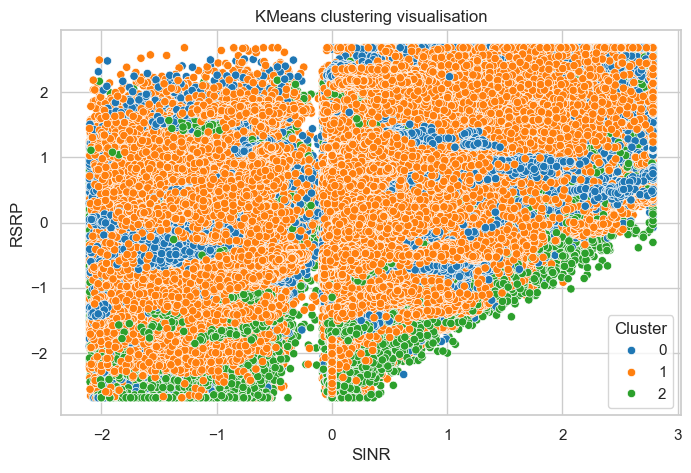

In [103]:
# Visualise KMeans cluster

plt.figure(figsize=(8,5))
sns.scatterplot(x=X['SINR'] , y=X['RSRP'] , hue=kmeans_labels, palette='tab10')
plt.title("KMeans clustering visualisation")
plt.xlabel('SINR')
plt.ylabel('RSRP')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

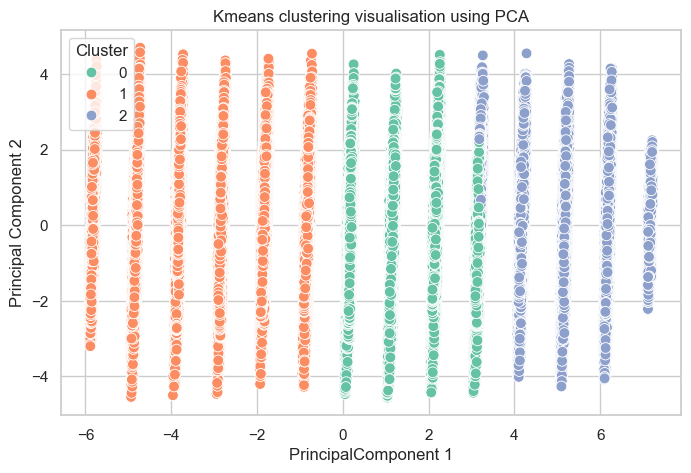

In [117]:
# Visualise KMeans clusters using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA1','PCA2'])
pca_df['Cluster'] = kmeans_labels

# visualise clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data =pca_df, x='PCA1',y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title("Kmeans clustering visualisation using PCA")
plt.xlabel('PrincipalComponent 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper left')
plt.grid(True)
plt.show()

In [119]:
# Kmeans evaluation using silhouette scores

# importing library
from sklearn.metrics import silhouette_score

# Define the sample size threshold 
SAMPLE_SIZE = 10000

if X.shape[0] > SAMPLE_SIZE:
    # Randomly select a subset of row indices
    sample_indices = np.random.choice(X.shape[0], size=SAMPLE_SIZE, replace=False)
    
    # Use .iloc to get rows based on integer location
    X_sample = X.iloc[sample_indices, :]
    labels_sample = kmeans_labels[sample_indices]  
    
    # Compute silhouette score on the subsample
    kmeans_silhouette = silhouette_score(X_sample, labels_sample)
    print(f"KMeans Silhouette score (computed on a sample of {SAMPLE_SIZE} points): {kmeans_silhouette:.3f}")
else:
    # If the dataset is small enough, compute on the whole dataset
    kmeans_silhouette = silhouette_score(X, kmeans_labels)
    print(f"KMeans silhouette score: {kmeans_silhouette:.3f}")


KMeans Silhouette score (computed on a sample of 10000 points): 0.294


In [123]:
# KMeans evaluation using Calinski harabasz score

from sklearn.metrics import calinski_harabasz_score

# Define the sample size threshold 
SAMPLE_SIZE = 10000

# Check if the dataset is larger than the sample size
if X.shape[0] > SAMPLE_SIZE:
    # Randomly select a subset of row indices (without replacement)
    sample_indices = np.random.choice(X.shape[0], size=SAMPLE_SIZE, replace=False)

    # Get sampled data and corresponding cluster labels
    X_sample = X.iloc[sample_indices, :]
    labels_sample = kmeans_labels[sample_indices]  # assuming kmeans_labels is numpy array or Series

    # Compute CHI on the sampled data
    kmeans_chi = calinski_harabasz_score(X_sample, labels_sample)
    print(f"KMeans Calinski-Harabasz Index (sampled, {SAMPLE_SIZE} points): {kmeans_chi:.3f}")
else:
    # If small enough, compute on the full dataset
    kmeans_chi = calinski_harabasz_score(X, kmeans_labels)
    print(f"KMeans Calinski-Harabasz Index: {kmeans_chi:.3f}")

KMeans Calinski-Harabasz Index (sampled, 10000 points): 7204.741


## DBSCAN Clustering

In [128]:
# importing library
from sklearn.cluster import DBSCAN

# Applying DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

df_4g['DBSCAN_Cluster'] = dbscan_labels

C:\Users\tejus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


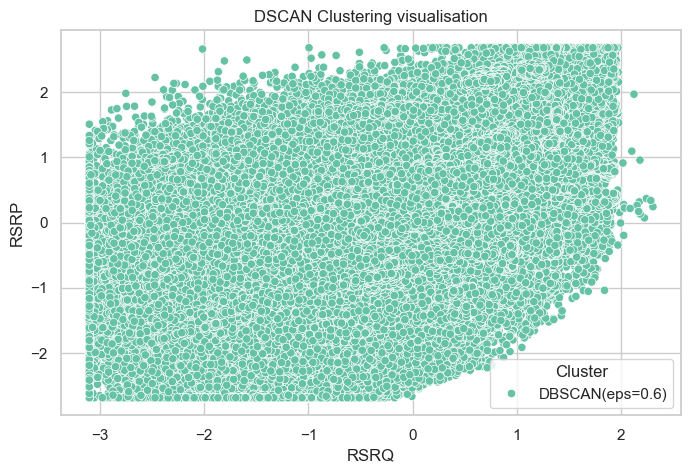

In [130]:
# Visualise DBSCAN clustering

plt.figure(figsize=(8,5))
sns.scatterplot(x=X['RSRQ'],y=X['RSRP'], hue=dbscan, palette='Set2')
plt.title("DSCAN Clustering visualisation")
plt.xlabel('RSRQ')
plt.ylabel('RSRP')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [180]:
# DBSCAN evaluation using silhouette scores

# Mask out noise
mask = dbscan_labels != -1
X_valid = X[mask]
labels_valid = dbscan_labels[mask]

# Sample only if enough data remains
if len(set(labels_valid)) > 1 and len(X_valid) > 5000:
    # Sample a subset (e.g., 5000 points max for speed)
    idx = np.random.choice(len(X_valid), size=5000, replace=False)
    sample_X = X_valid.iloc[idx]
    sample_labels = labels_valid[idx]

    # Compute silhouette score on the sample
    dbscan_silhouette = silhouette_score(sample_X, sample_labels)
    print(f"DBSCAN Silhouette Score (sampled): {dbscan_silhouette:.3f}")
elif len(set(labels_valid)) > 1:
    dbscan_silhouette = silhouette_score(X_valid, labels_valid)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
else:
    print("DBSCAN didn't form enough clusters to calculate silhouette score.")


DBSCAN Silhouette Score (sampled): 0.012


In [134]:
# DBSCAN evaluation using Calinski-Harabasz scores

if X.shape[0] > SAMPLE_SIZE:
    sample_indices = np.random.choice(X.shape[0], size=SAMPLE_SIZE, replace=False)
    X_sample = X.iloc[sample_indices, :]
    labels_sample = dbscan_labels[sample_indices]
else:
    X_sample = X
    labels_sample = dbscan_labels

# Filter out noise points
mask = labels_sample != -1
if np.unique(labels_sample[mask]).size > 1:
    dbscan_chi = calinski_harabasz_score(X_sample[mask], labels_sample[mask])
    print(f"DBSCAN Calinski-Harabasz Index (sampled, excluding noise): {dbscan_chi:.3f}")
else:
    print("DBSCAN Calinski-Harabasz Index: Not enough clusters after excluding noise.")


DBSCAN Calinski-Harabasz Index (sampled, excluding noise): 656.937


## Agglomerative Clustering

In [137]:
# Applying and evaluating agglomerative clustering 

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ['SINR','RSRP','RSRQ','Speed','distance','Hour']

sample_size = 10000
if X.shape[0] > sample_size:
    sample_idx = np.random.choice(X.index, size=sample_size, replace=False)
    X_sample = X.loc[sample_idx]
else:
    X_sample = X.copy()

# Apply Agglomerative Clustering on the sample
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels_sample = agglo.fit_predict(X_sample)

# Calculate silhouette score on the sample
silhouette_agglo = silhouette_score(X_sample, agglo_labels_sample)
print(f"Agglomerative Clustering Silhouette Score on sampled data: {silhouette_agglo:.3f}")


Agglomerative Clustering Silhouette Score on sampled data: 0.289


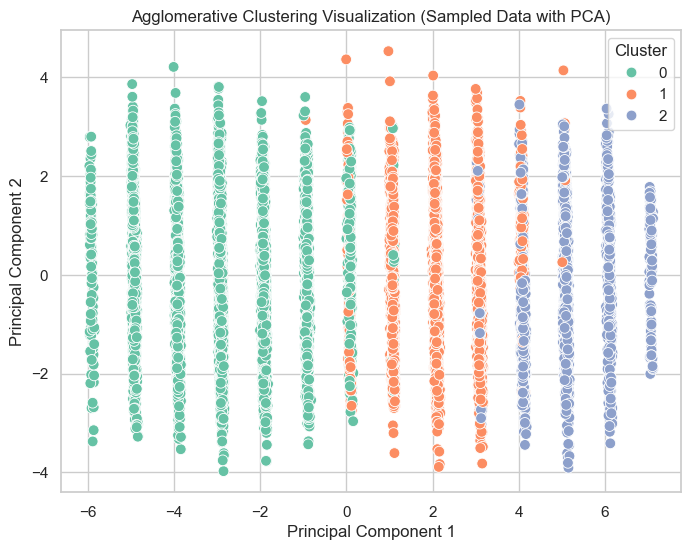

In [139]:
# Visualization Agglomerative clusters using PCA 

pca = PCA(n_components=2)
X_sample_pca = pca.fit_transform(X_sample)

# Prepare data for visualization
vis_df = pd.DataFrame(data=X_sample_pca, columns=['PCA1', 'PCA2'])
vis_df['Cluster'] = agglo_labels_sample

plt.figure(figsize=(8, 6))
sns.scatterplot(data=vis_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Agglomerative Clustering Visualization (Sampled Data with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [141]:
# Agglomerative clustering evaluation by calinski harabasz score

from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Subsample the dataset first
SAMPLE_SIZE = 10000
sample_indices = np.random.choice(X.shape[0], size=SAMPLE_SIZE, replace=False)
X_sample = X.iloc[sample_indices, :].to_numpy()

# Perform Agglomerative Clustering on the subsample
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels_sample = agglo.fit_predict(X_sample)

# Calculate the Calinski-Harabasz score for the sample
agglo_chi = calinski_harabasz_score(X_sample, agglo_labels_sample)
print(f"Agglomerative Clustering Calinski-Harabasz Score (sample): {agglo_chi:.3f}")


Agglomerative Clustering Calinski-Harabasz Score (sample): 5328.707


In [149]:
# Agglomerative summary

# Subsample the dataset
SAMPLE_SIZE = 10000
sample_indices = np.random.choice(X.shape[0], size=SAMPLE_SIZE, replace=False)
X_sample = X.iloc[sample_indices, :].copy()  # Keep it as DataFrame for grouping later

# Perform Agglomerative Clustering on the subsample
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo_labels_sample = agglo.fit_predict(X_sample)

# Add the cluster labels to the subsample DataFrame
X_sample['Agglo_Cluster'] = agglo_labels_sample

# Group by Agglomerative Clusters and calculate mean for selected features
features = ['SINR', 'RSRP', 'RSRQ', 'Speed', 'distance', 'Hour']
agglo_cluster_summary = X_sample.groupby('Agglo_Cluster')[features].mean()

# Display the summary
print("Agglomerative Clustering Cluster Summary (Sample):")
print(agglo_cluster_summary)

Agglomerative Clustering Cluster Summary (Sample):
                   SINR      RSRP      RSRQ     Speed  distance       Hour
Agglo_Cluster                                                             
0              0.741543  0.640410  0.742921  0.143967 -0.029238  10.535297
1             -0.040418  0.071332 -0.078888 -0.086682 -0.124408  14.660238
2             -0.031780 -0.256766 -0.053976  0.085685  0.300896  17.665598
3             -0.586292 -0.442466 -0.539697 -0.118386 -0.019531   9.881025


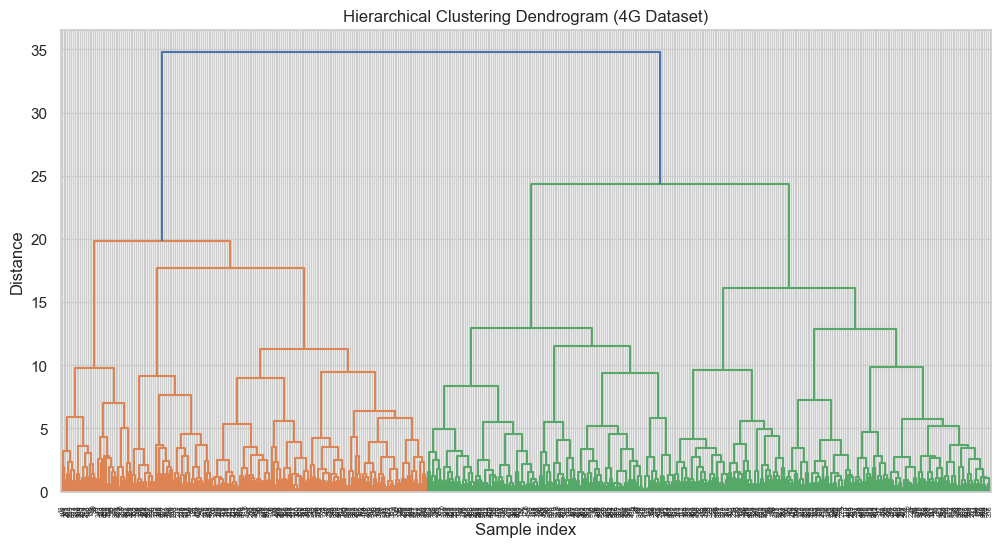

In [194]:
# Dendogram visualisation

import scipy.cluster.hierarchy as sch

# 4G features to include
features = ['SINR','RSRP','RSRQ','Speed','distance','Hour']

# scale the data for hierarchical clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[features])

# Sample data for dendrogram to avoid overcrowding
sample_size = 500  
if X_scaled.shape[0] > sample_size:
    sample_idx = np.random.choice(range(X_scaled.shape[0]), size=sample_size, replace=False)
    X_sample = X_scaled[sample_idx]
else:
    X_sample = X_scaled

# Generate the linkage matrix
linkage_matrix = sch.linkage(X_sample, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (4G Dataset)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


## Gaussian mixture

In [154]:
# Applying Gaussian mixture

# Hard Clustering
from sklearn.mixture import GaussianMixture

# Fit GMM 
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)
df_4g['GMM_Cluster'] = gmm_labels

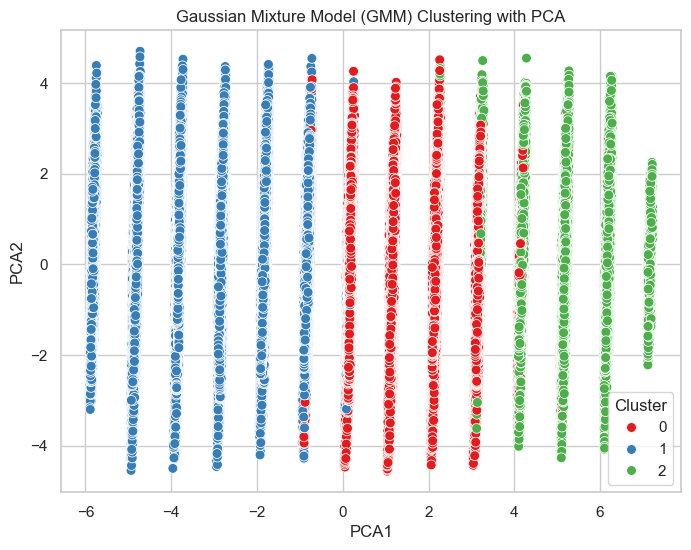

In [156]:
# Visualize Gaussian using PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

gmm_vis = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
gmm_vis['Cluster'] = gmm_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=gmm_vis, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=50)
plt.title("Gaussian Mixture Model (GMM) Clustering with PCA")
plt.grid(True)
plt.show()

In [158]:
# Gaussian evaluation using silhouette scores

# Set seed for reproducibility
np.random.seed(42)

# Sample 2000 points
sample_indices = np.random.choice(X.shape[0], 2000, replace=False)
X_sample = X.iloc[sample_indices]
gmm_labels_sample = gmm_labels[sample_indices]

# Compute silhouette score on the sample
gmm_silhouette = silhouette_score(X_sample, gmm_labels_sample)
print(f"GMM Silhouette Score (sampled): {gmm_silhouette:.3f}")


GMM Silhouette Score (sampled): 0.287


In [160]:
# Gaussian evaluation by Calinski harabasz score

if X.shape[0] > SAMPLE_SIZE:
    sample_indices = np.random.choice(X.shape[0], size=SAMPLE_SIZE, replace=False)
    X_sample = X.iloc[sample_indices, :]
    labels_sample = gmm_labels[sample_indices]
    gmm_chi = calinski_harabasz_score(X_sample, labels_sample)
    print(f"GMM Calinski-Harabasz Index (sampled): {gmm_chi:.3f}")
else:
    gmm_chi = calinski_harabasz_score(X, gmm_labels)
    print(f"GMM Calinski-Harabasz Index: {gmm_chi:.3f}")


GMM Calinski-Harabasz Index (sampled): 6931.701


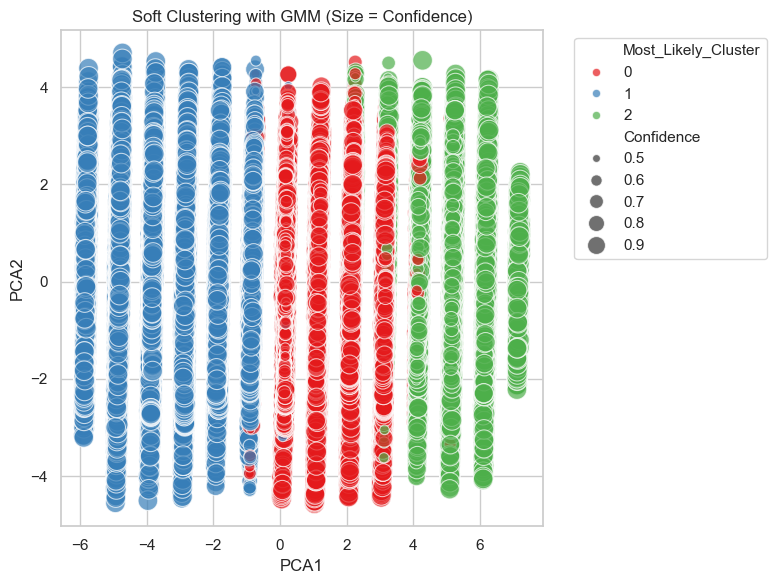

In [190]:
# Fit GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Get soft clustering probabilities
probs = gmm.predict_proba(X)  # shape: (n_samples, n_components)

# Add max probability as a measure of certainty
max_probs = probs.max(axis=1)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create DataFrame for visualization
gmm_soft_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
gmm_soft_df['Most_Likely_Cluster'] = gmm.predict(X)
gmm_soft_df['Confidence'] = max_probs

# Plot using confidence to adjust transparency
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=gmm_soft_df,
    x='PCA1',
    y='PCA2',
    hue='Most_Likely_Cluster',
    size='Confidence',  # Shows certainty via point size
    sizes=(20, 200),    # Range of sizes
    palette='Set1',
    alpha=0.7
)
plt.title("Soft Clustering with GMM (Size = Confidence)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [168]:
features = ['SINR','RSRP','RSRQ','Speed', 'distance','Hour']

# KMeans Summary
print("KMeans Cluster Summary:")
print(df_4g.groupby('KMeans_Clusters')[features].mean())
print("\n")

# DBSCAN Summary (ignore noise cluster -1)
print("DBSCAN Cluster Summary:")
print(df_4g[dbscan_labels != -1].groupby('DBSCAN_Cluster')[['SINR','RSRP','RSRQ','Speed', 'distance','Hour']].mean())
print("\n")

# Agglomerative Clustering Summary
print("Agglomerative Clustering Summary:")
X_sample.loc[:, 'Agglo_Cluster'] = agglo_labels_sample
print(X_sample.groupby('Agglo_Cluster')[features].mean())
print("\n")

# Gaussian Mixture Model (GMM) Summary
print("GMM Cluster Summary:")
print(df_4g.groupby('GMM_Cluster')[features].mean())


KMeans Cluster Summary:
                     SINR      RSRP      RSRQ     Speed  distance       Hour
KMeans_Clusters                                                             
0                0.095197  0.129065  0.093624 -0.104919 -0.086660  14.486515
1               -0.018182  0.034646  0.020092 -0.017493 -0.017422  10.036465
2               -0.093973 -0.282331 -0.191633  0.201632  0.174310  17.654192


DBSCAN Cluster Summary:
                    SINR      RSRP      RSRQ     Speed  distance  Hour
DBSCAN_Cluster                                                        
0              -0.029781  0.040255 -0.013698 -0.202173  0.002749   9.0
1               1.262158  0.516861 -1.070889  0.646681  1.146492   9.0
2              -1.187466  1.243030 -0.440275 -0.395944 -2.950955   9.0
3               0.001441  0.295250 -2.498725 -1.597452 -1.949689   9.0
4               0.001441  0.237265 -1.882193  0.414115 -2.624142   9.0
...                  ...       ...       ...       ...       ...   .

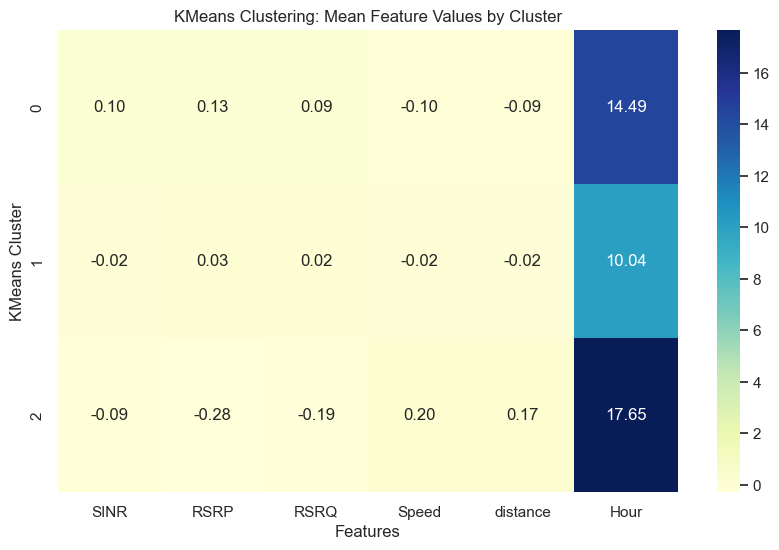

In [170]:
# Visualising kmeans Clustering: Mean Feature Values by Cluster

features = ['SINR', 'RSRP', 'RSRQ', 'Speed', 'distance', 'Hour']

# Calculate the cluster means for kmeans  Clustering
kmeans_summary = df_4g.groupby('KMeans_Clusters')[features].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(kmeans_summary, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("KMeans Clustering: Mean Feature Values by Cluster")
plt.xlabel("Features")
plt.ylabel("KMeans Cluster")
plt.show()

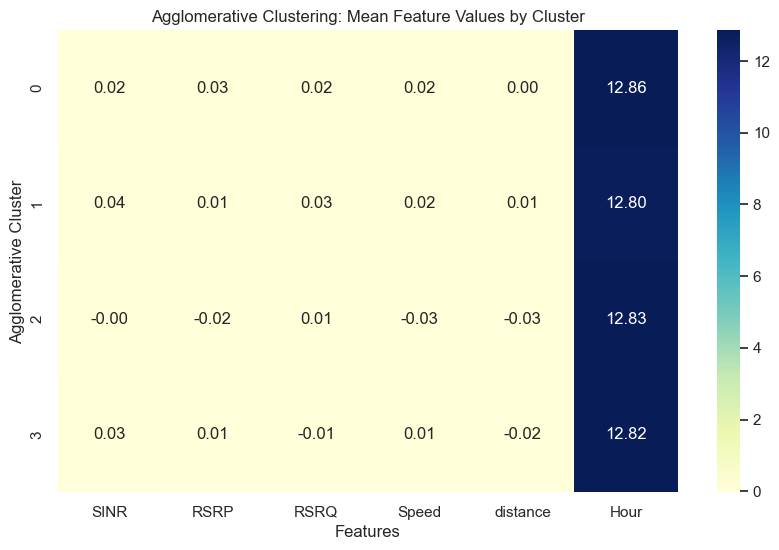

In [172]:
# Visualising Agglomerative Clustering: Mean Feature Values by Cluster

features = ['SINR', 'RSRP', 'RSRQ', 'Speed', 'distance', 'Hour']

# Calculate the cluster means for Agglomerative Clustering
agglo_summary = X_sample.groupby('Agglo_Cluster')[features].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(agglo_summary, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Agglomerative Clustering: Mean Feature Values by Cluster")
plt.xlabel("Features")
plt.ylabel("Agglomerative Cluster")
plt.show()


# Task 3 Classification

### Data Preprocessing of 5G dataset

In [201]:
# Importing 5G dataset

df_5g= pd.read_csv("5G - Passive Measurements.csv")

In [203]:
# view first five rows 
print("Five rows of 5G dataset\n")
df_5g.head()

Five rows of 5G dataset



Unnamed: 0        Date          Time           UTC   Latitude  Longitude  \
0     1018000  14.01.2021  09:19:25.179  1.613291e+09  41.896705  12.507339   
1     1119000  14.01.2021  09:19:25.180  1.613291e+09  41.896705  12.507339   
2     1210400  14.01.2021  09:19:25.179  1.613291e+09  41.896705  12.507339   
3     1311800  14.01.2021  09:19:25.198  1.613291e+09  41.896705  12.507339   
4     1410409  14.01.2021  09:19:25.180  1.613291e+09  41.896705  12.507339   

   Altitude  Speed  EARFCN  Frequency  Band  PCI  SSBIdx  SSS-SINR  SSS-RSRP  \
0      50.3   3.46  643296    3649.44    78    6       3     -11.6    -116.5   
1      50.3   3.46  643296    3649.44    78  300       7      -5.3    -111.5   
2      50.3   3.46  643296    3649.44    78    6       4      -2.3    -110.3   
3      50.3   3.46  643296    3649.44    78  260       2     -12.7    -117.3   
4      50.3   3.46  643296    3649.44    78  564       7      -8.9    -114.4   

   SSS-RSRQ  SSS-RePower      MNC  DM_RS-SINR  DM_RS-RSRP  DM_RS-RSRQ  \
0     -22.3       -104.6  "Op"[2]       -12.5      -116.8       -23.6   
1     -16.9       -105.0  "Op"[2]        -6.3      -112.3       -18.0   
2     -14.8       -106.0  "Op"[2]        -2.9      -110.6       -15.7   
3     -23.3       -104.4  "Op"[2]         NaN         NaN         NaN   
4     -19.8       -105.0  "Op"[2]       -11.1      -116.5       -22.2   

   DM_RS-RePower  PBCH-SINR  PBCH-RSRP  PBCH-RSRQ  PBCH-RePower  PSS-SINR  \
0         -104.0      -13.0     -117.2      -24.0        -104.0      -6.5   
1         -105.1       -6.5     -112.4      -18.1        -105.1      -4.9   
2         -105.8       -3.3     -110.6      -15.7        -105.6      -3.4   
3            NaN        NaN        NaN        NaN           NaN     -11.8   
4         -105.1       -9.9     -115.4      -21.1        -105.1      -7.3   

   PSS-RSRP  PSS-RSRQ  PSS-RePower  SS_PBCH-SINR  SS_PBCH-RSRP  SS_PBCH-RSRQ  \
0    -112.2     -17.8       -104.8         -11.3        -115.8         -22.3   
1    -111.6     -16.5       -105.4          -6.0        -112.1         -17.6   
2    -111.2     -15.5       -106.1          -3.1        -110.6         -15.5   
3    -116.5     -22.5       -104.4           NaN           NaN           NaN   
4    -113.2     -18.5       -105.1          -9.4        -115.0         -20.6   

   SS_PBCH-RePower scenario  distance_w                 campaign  
0           -104.2       OW         0.0  campaign_6_OW_5G_gaming  
1           -105.1       OW         0.0  campaign_6_OW_5G_gaming  
2           -105.8       OW         0.0  campaign_6_OW_5G_gaming  
3              NaN       OW         0.0  campaign_6_OW_5G_gaming  
4           -105.1       OW         0.0  campaign_6_OW_5G_gaming

In [205]:
print("Shape of 5G dataset :",df_5g.shape)

Shape of 5G dataset : (8144644, 37)


In [207]:
# columns of 5g dataset
print("Columns of 5g dataset\n")
df_5g.columns

Columns of 5g dataset



Index(['Unnamed: 0', 'Date', 'Time', 'UTC', 'Latitude', 'Longitude',
       'Altitude', 'Speed', 'EARFCN', 'Frequency', 'Band', 'PCI', 'SSBIdx',
       'SSS-SINR', 'SSS-RSRP', 'SSS-RSRQ', 'SSS-RePower', 'MNC', 'DM_RS-SINR',
       'DM_RS-RSRP', 'DM_RS-RSRQ', 'DM_RS-RePower', 'PBCH-SINR', 'PBCH-RSRP',
       'PBCH-RSRQ', 'PBCH-RePower', 'PSS-SINR', 'PSS-RSRP', 'PSS-RSRQ',
       'PSS-RePower', 'SS_PBCH-SINR', 'SS_PBCH-RSRP', 'SS_PBCH-RSRQ',
       'SS_PBCH-RePower', 'scenario', 'distance_w', 'campaign'],
      dtype='object')

In [209]:
# summary statistics of 5g 
print("Summary statistics of 5G dataset \n")
df_5g.describe()

Summary statistics of 5G dataset 



Unnamed: 0           UTC      Latitude     Longitude      Altitude  \
count  8.144644e+06  7.625134e+06  8.144644e+06  8.144644e+06  7.625144e+06   
mean   7.264260e+06  1.611472e+09  4.188311e+01  1.248547e+01  7.114848e+01   
std    8.232689e+06  1.092663e+06  1.362870e-02  2.220595e-02  4.463448e+01   
min    1.000000e+00  1.610528e+09  4.182374e+01  1.241850e+01 -1.397400e+02   
25%    2.393279e+06  1.610653e+09  4.187165e+01  1.246451e+01  4.451000e+01   
50%    5.099570e+06  1.610882e+09  4.188967e+01  1.249408e+01  6.608000e+01   
75%    9.514520e+06  1.612434e+09  4.189339e+01  1.249504e+01  9.083000e+01   
max    1.337211e+08  1.614353e+09  4.190310e+01  1.253385e+01  4.576500e+02   

              Speed        EARFCN     Frequency       Band           PCI  \
count  7.625134e+06  8.144644e+06  8.144644e+06  8144644.0  8.144644e+06   
mean   4.805149e+00  6.439952e+05  3.659929e+03       78.0  2.040252e+02   
std    9.289222e+00  1.751807e+03  2.627710e+01        0.0  1.036128e+02   
min    0.000000e+00  6.432960e+05  3.649440e+03       78.0  0.000000e+00   
25%    5.800000e-01  6.432960e+05  3.649440e+03       78.0  1.740000e+02   
50%    2.020000e+00  6.432960e+05  3.649440e+03       78.0  1.780000e+02   
75%    4.430000e+00  6.432960e+05  3.649440e+03       78.0  2.760000e+02   
max    8.208000e+01  6.483840e+05  3.725760e+03       78.0  6.550000e+02   

             SSBIdx      SSS-SINR      SSS-RSRP      SSS-RSRQ   SSS-RePower  \
count  8.144644e+06  8.144644e+06  8.144644e+06  8.144644e+06  8.144644e+06   
mean   2.897570e+00 -9.994347e+00 -1.214935e+02 -2.207226e+01 -1.095772e+02   
std    2.377756e+00  1.041867e+01  1.067987e+01  7.404075e+00  8.346378e+00   
min    0.000000e+00 -5.140000e+01 -1.559000e+02 -6.070000e+01 -1.254000e+02   
25%    1.000000e+00 -1.680000e+01 -1.293000e+02 -2.700000e+01 -1.157000e+02   
50%    3.000000e+00 -1.130000e+01 -1.236000e+02 -2.200000e+01 -1.115000e+02   
75%    5.000000e+00 -4.200000e+00 -1.160000e+02 -1.600000e+01 -1.044000e+02   
max    7.000000e+00  4.520000e+01 -5.120000e+01 -1.020000e+01 -5.160000e+01   

         DM_RS-SINR    DM_RS-RSRP    DM_RS-RSRQ  DM_RS-RePower     PBCH-SINR  \
count  8.144596e+06  8.144596e+06  8.144596e+06   8.144596e+06  8.144596e+06   
mean  -9.915880e+00 -1.214775e+02 -2.238280e+01  -1.096387e+02 -9.925716e+00   
std    1.042048e+01  1.070083e+01  7.325926e+00   8.325021e+00  1.041752e+01   
min   -5.110000e+01 -1.559000e+02 -5.860000e+01  -1.255000e+02 -5.110000e+01   
25%   -1.670000e+01 -1.293000e+02 -2.720000e+01  -1.157000e+02 -1.670000e+01   
50%   -1.130000e+01 -1.236000e+02 -2.230000e+01  -1.116000e+02 -1.130000e+01   
75%   -4.300000e+00 -1.160000e+02 -1.640000e+01  -1.045000e+02 -4.300000e+00   
max    3.910000e+01 -5.140000e+01 -1.060000e+01  -5.180000e+01  4.520000e+01   

          PBCH-RSRP     PBCH-RSRQ  PBCH-RePower      PSS-SINR      PSS-RSRP  \
count  8.144596e+06  8.144596e+06  8.144596e+06  8.144644e+06  8.144644e+06   
mean  -1.214816e+02 -2.238744e+01 -1.096405e+02 -9.546565e+00 -1.213656e+02   
std    1.070502e+01  7.331567e+00  8.322887e+00  1.072197e+01  1.076002e+01   
min   -1.559000e+02 -6.140000e+01 -1.250000e+02 -5.150000e+01 -1.559000e+02   
25%   -1.293000e+02 -2.720000e+01 -1.157000e+02 -1.660000e+01 -1.293000e+02   
50%   -1.236000e+02 -2.230000e+01 -1.116000e+02 -1.110000e+01 -1.235000e+02   
75%   -1.160000e+02 -1.640000e+01 -1.045000e+02 -3.500000e+00 -1.158000e+02   
max   -5.140000e+01 -1.080000e+01 -5.180000e+01  4.520000e+01 -5.120000e+01   

           PSS-RSRQ   PSS-RePower  SS_PBCH-SINR  SS_PBCH-RSRP  SS_PBCH-RSRQ  \
count  8.144644e+06  8.144644e+06  8.144596e+06  8.144596e+06  8.144596e+06   
mean  -2.179007e+01 -1.097062e+02 -9.917896e+00 -1.214690e+02 -2.226238e+01   
std    7.474601e+00  8.385293e+00  1.043717e+01  1.070830e+01  7.357874e+00   
min   -5.980000e+01 -1.259000e+02 -5.120000e+01 -1.559000e+02 -5.970000e+01   
25%   -2.680000e+01 -1.159000e+02 -1.670000e+01 -1.293000e+02 -2.710000e

In [211]:
#Genral information of 5g
df_5g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144644 entries, 0 to 8144643
Data columns (total 37 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   Date             object 
 2   Time             object 
 3   UTC              float64
 4   Latitude         float64
 5   Longitude        float64
 6   Altitude         float64
 7   Speed            float64
 8   EARFCN           int64  
 9   Frequency        float64
 10  Band             int64  
 11  PCI              int64  
 12  SSBIdx           int64  
 13  SSS-SINR         float64
 14  SSS-RSRP         float64
 15  SSS-RSRQ         float64
 16  SSS-RePower      float64
 17  MNC              object 
 18  DM_RS-SINR       float64
 19  DM_RS-RSRP       float64
 20  DM_RS-RSRQ       float64
 21  DM_RS-RePower    float64
 22  PBCH-SINR        float64
 23  PBCH-RSRP        float64
 24  PBCH-RSRQ        float64
 25  PBCH-RePower     float64
 26  PSS-SINR         float64
 27  PSS-RSRP    

In [213]:
# analysing missing values
df_5g.isnull().sum()

Unnamed: 0               0
Date                     0
Time                     0
UTC                 519510
Latitude                 0
Longitude                0
Altitude            519500
Speed               519510
EARFCN                   0
Frequency                0
Band                     0
PCI                      0
SSBIdx                   0
SSS-SINR                 0
SSS-RSRP                 0
SSS-RSRQ                 0
SSS-RePower              0
MNC                      0
DM_RS-SINR              48
DM_RS-RSRP              48
DM_RS-RSRQ              48
DM_RS-RePower           48
PBCH-SINR               48
PBCH-RSRP               48
PBCH-RSRQ               48
PBCH-RePower            48
PSS-SINR                 0
PSS-RSRP                 0
PSS-RSRQ                 0
PSS-RePower              0
SS_PBCH-SINR            48
SS_PBCH-RSRP            48
SS_PBCH-RSRQ            48
SS_PBCH-RePower         48
scenario                 0
distance_w         4076613
campaign                 0
d

In [293]:
# Drop duplicate rows
df_5g.drop_duplicates(inplace=True)

# drop constant columns
drop_cols = ['Unnamed: 0', 'Date', 'scenario', 'campaign']
df_5g.drop(columns=drop_cols, inplace=True, errors='ignore')

# Fill missing values for each column explicitly
for col in df_5g.columns:
    if df_5g[col].dtype in ['int64', 'float64']:
        df_5g[col] = df_5g[col].fillna(df_5g[col].mean())
    else:
        df_5g[col] = df_5g[col].fillna(df_5g[col].mode()[0])

In [225]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoders = {}
for col in df_5g.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_5g[col] = le.fit_transform(df_5g[col])
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
numeric_cols = df_5g.select_dtypes(include=['int64', 'float64']).columns
df_5g[numeric_cols] = scaler.fit_transform(df_5g[numeric_cols])

# Show cleaned and preprocessed data
print(df_5g.head())

     Time      UTC  Latitude  Longitude  Altitude     Speed    EARFCN  \
0  104316  1.71993  0.997679   0.984793 -0.482744 -0.149659 -0.399158   
1  104317  1.71993  0.997679   0.984793 -0.482744 -0.149659 -0.399158   
2  104316  1.71993  0.997679   0.984793 -0.482744 -0.149659 -0.399158   
3  104318  1.71993  0.997679   0.984793 -0.482744 -0.149659 -0.399158   
4  104317  1.71993  0.997679   0.984793 -0.482744 -0.149659 -0.399158   

   Frequency  Band       PCI    SSBIdx  SSS-SINR  SSS-RSRP  SSS-RSRQ  \
0  -0.399158   0.0 -1.911204  0.043078 -0.154113  0.467559 -0.030759   
1  -0.399158   0.0  0.926282  1.725336  0.450570  0.935729  0.698570   
2  -0.399158   0.0 -1.911204  0.463643  0.738515  1.048090  0.982197   
3  -0.399158   0.0  0.540230 -0.377486 -0.259693  0.392651 -0.165819   
4  -0.399158   0.0  3.474229  1.725336  0.105037  0.664190  0.306893   

   SSS-RePower  MNC    DM_RS-SINR    DM_RS-RSRP    DM_RS-RSRQ  DM_RS-RePower  \
0     0.596333    1 -2.479859e-01  4.371181e-01 

In [227]:
df_5g['time_in_hours'] = df_5g['Time'] / 3600  # assuming 'time' is in seconds
# Convert fractional hours to hours and minutes (HH:MM format)
df_5g['hours'] = df_5g['time_in_hours'].astype(int)  # Extract the integer part for hours
df_5g['minutes'] = ((df_5g['time_in_hours'] - df_5g['hours']) * 60).round().astype(int)  # Extract the fractional part and convert to minutes

# Combine hours and minutes into a string in HH:MM format
df_5g['time_in_hhmm'] = df_5g['hours'].astype(str) + ':' + df_5g['minutes'].astype(str).str.zfill(2)

# Show the result
print(df_5g[['time_in_hours', 'time_in_hhmm']])

         time_in_hours time_in_hhmm
0            28.976667        28:59
1            28.976944        28:59
2            28.976667        28:59
3            28.977222        28:59
4            28.976944        28:59
...                ...          ...
8144639     135.123333       135:07
8144640     135.123333       135:07
8144641     135.131111       135:08
8144642     135.123611       135:07
8144643     135.131389       135:08

[8144637 rows x 2 columns]


# Binary Classification

In [362]:
# Create binary target column based on SSS-RSRP
df_5g['Signal_Quality_Binary'] = (df_5g['SSS-SINR'] > 0).astype(int)

# Check how many of each class
print(df_5g['Signal_Quality_Binary'].value_counts())

Signal_Quality_Binary
0    4503574
1    3641063
Name: count, dtype: int64


In [364]:
# splitting train and test dataset 
from sklearn.model_selection import train_test_split

# Sample 
df_sampled = df_5g.sample(n=100000, random_state=42)
features = [ 'SSS-RSRP', 'SSS-RSRQ', 'DM_RS-RSRP', 'DM_RS-RSRQ', 'PBCH-RSRP', 'PBCH-RSRQ', 'distance_w']
X = df_sampled[features]
y = df_sampled['Signal_Quality_Binary']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)


### Random classifier

In [366]:
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# applying Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))



 Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     16470
           1       0.95      0.95      0.95     13530

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000



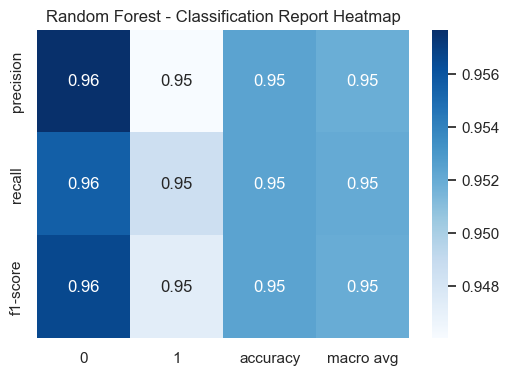

In [368]:
# Classification report heatmap for random forest

def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).iloc[:-1, :-1]  # exclude support/accuracy rows

    plt.figure(figsize=(6, 4))
    sns.heatmap(df_report, annot=True, cmap='Blues', fmt=".2f")
    plt.title(f'{model_name} - Classification Report Heatmap')
    plt.show()

# Plot reports
plot_classification_report(y_test, y_pred_rf, "Random Forest")

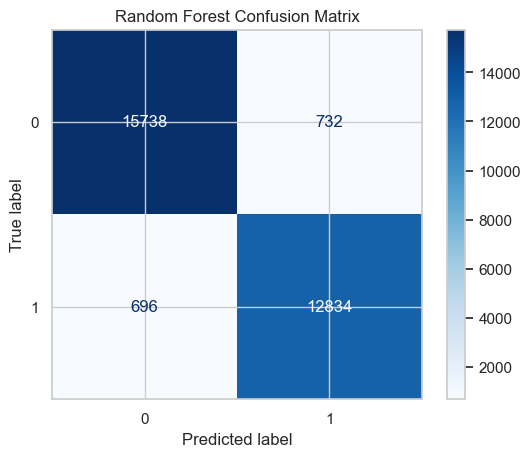

In [255]:
# Random Forest Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#confusion nmatrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

### SVM

In [273]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_clf = SVC(kernel='rbf', C=1, gamma='scale')  
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     16470
           1       0.95      0.96      0.95     13530

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000



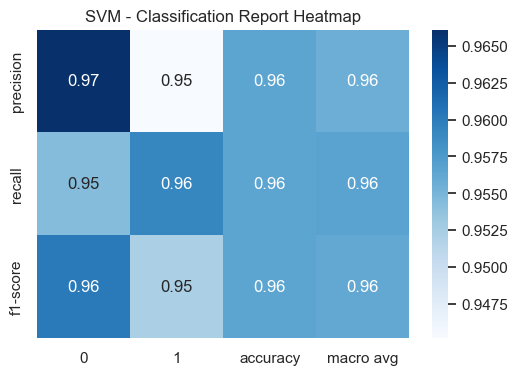

In [372]:
# Classification report heatmap for SVM

def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).iloc[:-1, :-1]  # exclude support/accuracy rows

    plt.figure(figsize=(6, 4))
    sns.heatmap(df_report, annot=True, cmap='Blues', fmt=".2f")
    plt.title(f'{model_name} - Classification Report Heatmap')
    plt.show()

# Plot reports
plot_classification_report(y_test, y_pred_svm, "SVM")

### Gaussian NB

In [374]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)

print("Gaussian Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))

Gaussian Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     16470
           1       0.95      0.88      0.91     13530

    accuracy                           0.92     30000
   macro avg       0.93      0.92      0.92     30000
weighted avg       0.93      0.92      0.92     30000




 Evaluation for Random Forest
----------------------------------------
Accuracy: 0.9524
Precision: 0.9524139286428817
Recall: 0.9524
F1 Score: 0.9524055815161458

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     16470
           1       0.95      0.95      0.95     13530

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000



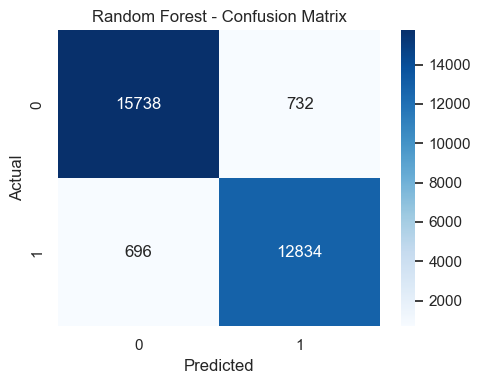


 Evaluation for SVM
----------------------------------------
Accuracy: 0.9565333333333333
Precision: 0.9566722873433605
Recall: 0.9565333333333333
F1 Score: 0.9565600223374451

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     16470
           1       0.95      0.96      0.95     13530

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000



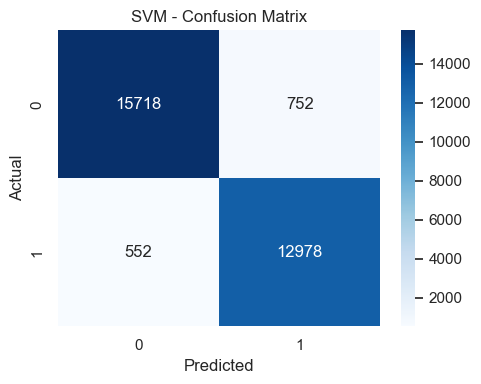


 Evaluation for Gaussian Naive Bayes
----------------------------------------
Accuracy: 0.9248666666666666
Precision: 0.9265813429656043
Recall: 0.9248666666666666
F1 Score: 0.924498469879148

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     16470
           1       0.95      0.88      0.91     13530

    accuracy                           0.92     30000
   macro avg       0.93      0.92      0.92     30000
weighted avg       0.93      0.92      0.92     30000



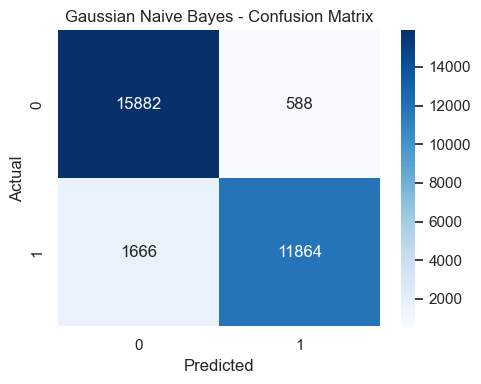

In [376]:
# Evaluation metrics of all binary classifiers

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Define your predictions and model names
model_preds = {
          "Random Forest": y_pred_rf,
           "SVM": y_pred_svm,
           "Gaussian Naive Bayes": y_pred_nb
}

# Loop over each model to print metrics
for model_name, y_pred in model_preds.items():
    print(f"\n Evaluation for {model_name}")
    print("-" * 40)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

### Feature importance of binary Random forest

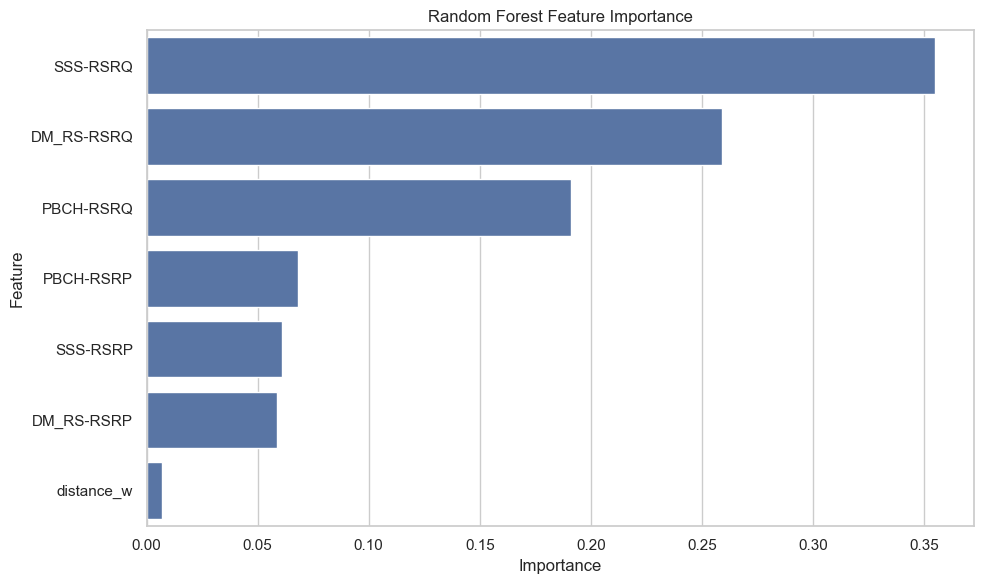

In [259]:
# Feature Importance (from Random Forest)

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

100%|===================| 59988/60000 [69:55<00:00]        

<Figure size 640x480 with 0 Axes>

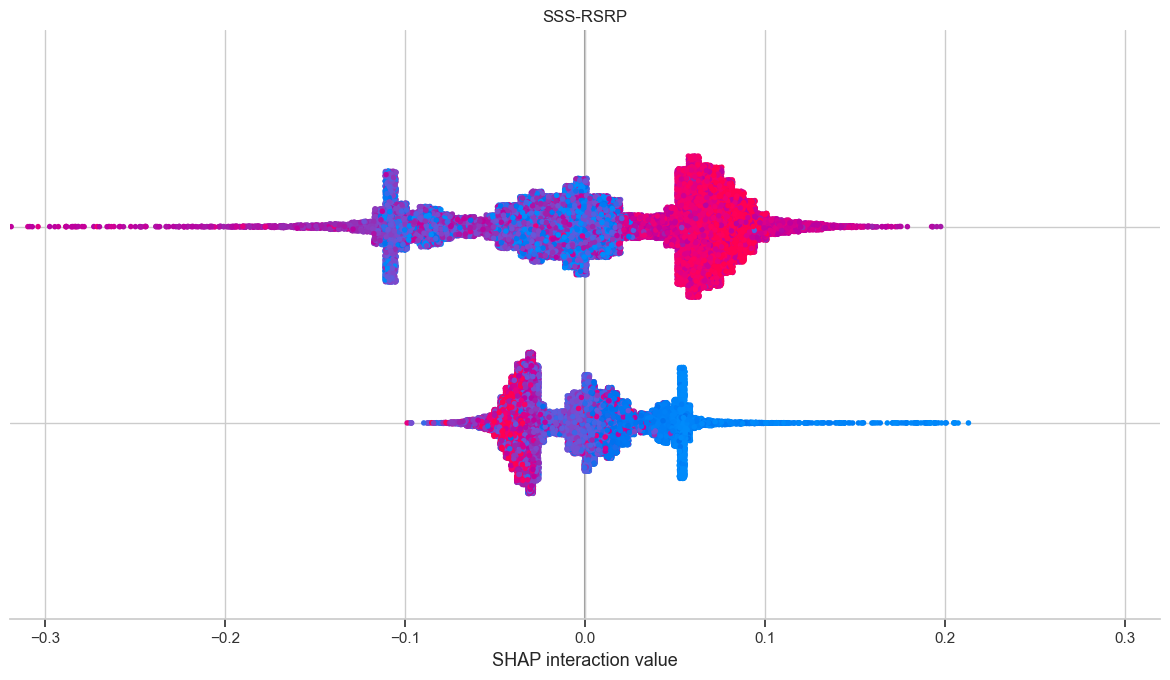

In [283]:
# SHAP plot for random classifier

import shap
X_train_df = pd.DataFrame(X_train, columns=features)
X_test_df = pd.DataFrame(X_test, columns=features)

explainer = shap.Explainer(rf, X_train_df)
shap_values = explainer(X_test_df, check_additivity=False)

# SHAP summary plot with proper feature names
shap.summary_plot(shap_values, X_test_df)



# Multi classification

In [412]:
# Create a multi-class target using pd.qcut to divide the SS_PBCH-RSRP column into 3 quantiles (classes)
# Here, q=3 creates three groups (roughly equal sized) with labels 0, 1, 2.
df_5g['Signal_Quality_Multi'] = pd.qcut(df_5g['SS_PBCH-RSRP'], q=3, labels=[0, 1, 2])

# Check the distribution of the multi-class target
print("Multi-class target distribution (using quantiles):")
print(df_5g['Signal_Quality_Multi'].value_counts())

Multi-class target distribution (using quantiles):
Signal_Quality_Multi
0    2730931
1    2724070
2    2689636
Name: count, dtype: int64


In [414]:
from sklearn.model_selection import train_test_split
# Sample 
df_sampled = df_5g.sample(n=100000, random_state=42)
features = [ 'SSS-SINR', 'SSS-RSRQ',
            'DM_RS-SINR', 'DM_RS-RSRQ',
            'PBCH-SINR', 'PBCH-RSRQ', 'distance_w']
X = df_sampled[features]
y = df_sampled['Signal_Quality_Multi'].astype(int)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

### Random forest

Random forest - Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.83      0.71      9988
           1       0.55      0.48      0.51     10065
           2       0.82      0.66      0.73      9947

    accuracy                           0.66     30000
   macro avg       0.66      0.66      0.65     30000
weighted avg       0.66      0.66      0.65     30000



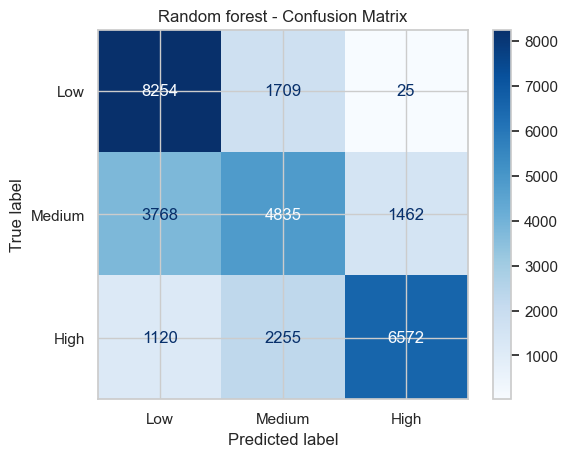

In [416]:
from sklearn.ensemble import RandomForestClassifier

# Train Random forest
rf_model = RandomForestClassifier(n_estimators=50,max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_r = rf_model.predict(X_test)

# Evaluation metrics
print("Random forest - Classification Report:\n", classification_report(y_test, y_pred_r))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_r)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap='Blues')
plt.title("Random forest - Confusion Matrix")
plt.show()

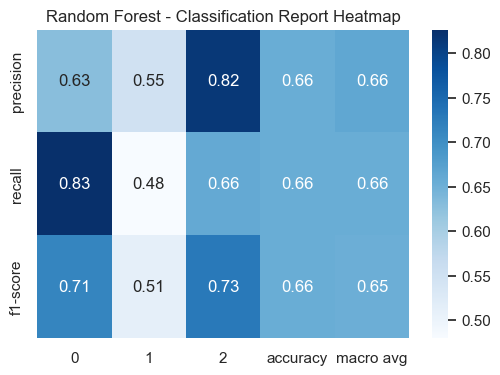

In [418]:
#' Classification report heatmap of random forest

def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).iloc[:-1, :-1]  # exclude support/accuracy rows

    plt.figure(figsize=(6, 4))
    sns.heatmap(df_report, annot=True, cmap='Blues', fmt=".2f")
    plt.title(f'{model_name} - Classification Report Heatmap')
    plt.show()
    
# Plot reports
plot_classification_report(y_test, y_pred_r, "Random Forest")

### Gradient Boosting

Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71      9988
           1       0.54      0.46      0.50     10065
           2       0.81      0.65      0.72      9947

    accuracy                           0.65     30000
   macro avg       0.66      0.65      0.64     30000
weighted avg       0.66      0.65      0.64     30000



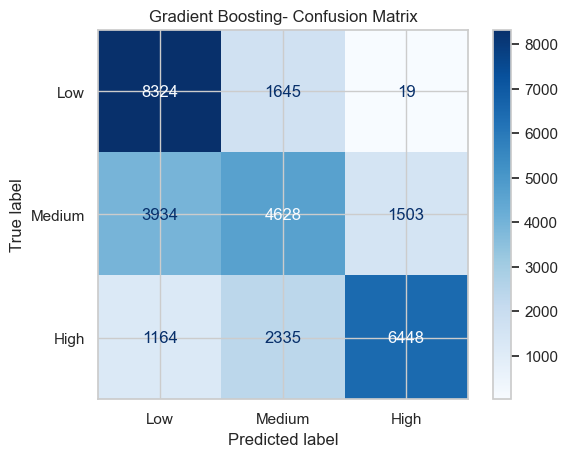

In [420]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)

# Evaluation metrics
print("Gradient Boosting - Classification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap='Blues')
plt.title("Gradient Boosting- Confusion Matrix")
plt.show()


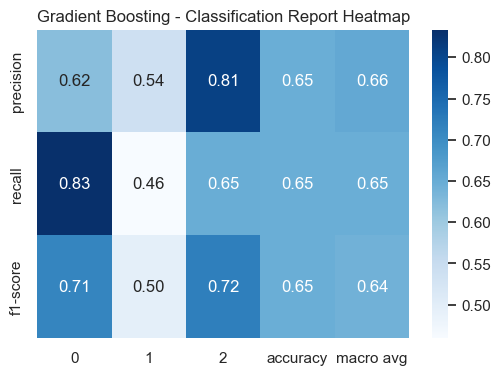

In [403]:
# Classification report heatmap for Gradient Boosting

# Plot reports
plot_classification_report(y_test, y_pred_gb, "Gradient Boosting")

### Logistic Regression

 Logistic regression - Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.68      0.65      9988
           1       0.48      0.45      0.46     10065
           2       0.74      0.72      0.73      9947

    accuracy                           0.62     30000
   macro avg       0.61      0.62      0.61     30000
weighted avg       0.61      0.62      0.61     30000



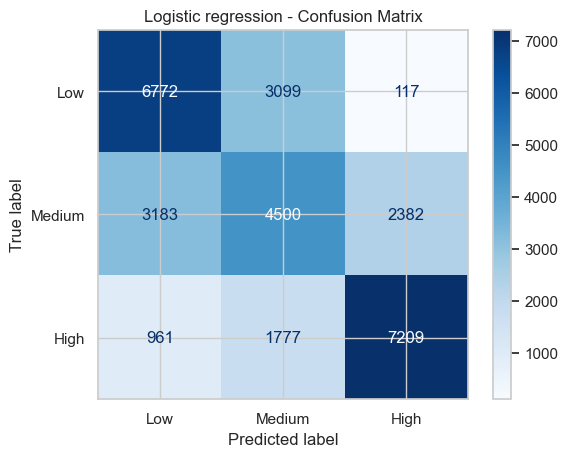

In [422]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train Logistic Regression
lg_model = LogisticRegression(max_iter=1000, multi_class='multinomial')
lg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lg = lg_model.predict(X_test)

# Evaluation metrics
print(" Logistic regression - Classification Report:\n", classification_report(y_test, y_pred_lg))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap='Blues')
plt.title("Logistic regression - Confusion Matrix")
plt.show()


### Feature importance of multi-class classifications

In [335]:
# Feature importance

def plot_feature_importance(model, feature_names, top_n=15, title="Feature Importance"):
    importances = model.feature_importances_

    # Create a DataFrame for visualization
    fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    fi_df = fi_df.sort_values(by='Importance', ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# feature names
feature_names = ['SSS-SINR', 'SSS-RSRQ', 'DM_RS-SINR', 'DM_RS-RSRQ', 'PBCH-SINR', 'PBCH-RSRQ', 'distance_w']






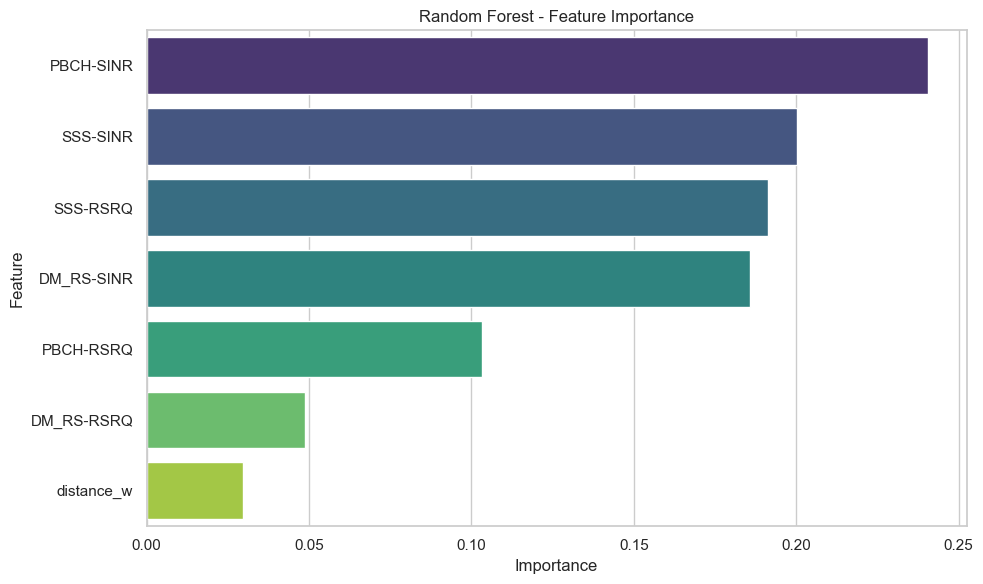

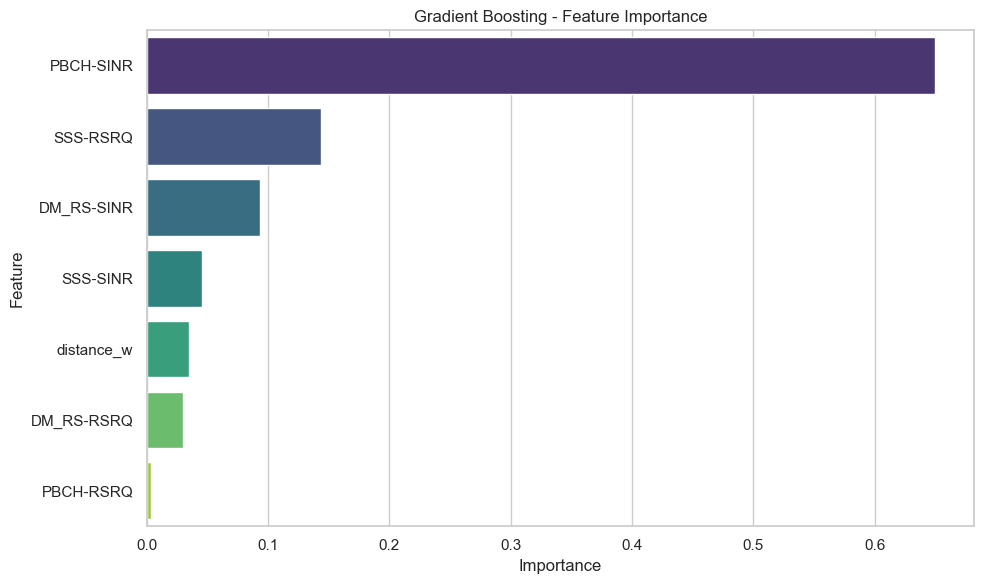

In [337]:
# For Random Forest (multi-class)
plot_feature_importance(rf_model, feature_names, title="Random Forest - Feature Importance")

# For Gradient Boosting
plot_feature_importance(gb_model, feature_names, title="Gradient Boosting - Feature Importance")


# Task 4- Optimization Using Genetic Algorithm

### Optimization on Clustering

### Kmeans optimisation

In [437]:
# importing libraries

import random
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import StandardScaler

In [439]:
# ----Data Preprocessing-----

# Features selection
features = ['SINR','RSRP','RSRQ','Speed','distance','Hour']
df_sample = df_4g.sample(n=20000, random_state=42).dropna()
X = df_sample[features]

#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [443]:
# ----GA configuration----

# DEAP Setup
if not hasattr(creator, "FitnessMax"):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
if not hasattr(creator, "Individual"):
    creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute: number of clusters (2-10)
toolbox.register("n_clusters", random.randint, 2, 10)
# Attribute: init method (0 = k-means++, 1 = random)
toolbox.register("init_method", random.randint, 0, 1)

# Individual: [k, init_method]
toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.n_clusters, toolbox.init_method), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [445]:
# -----Fitness Funtion-----

def eval_kmeans(individual):
    k, init_method_code = individual
    if k < 2:
        return (-1.0,)

    init_method = 'k-means++' if init_method_code == 0 else 'random'
    try:
        kmeans = KMeans(n_clusters=k, init=init_method, random_state=42)
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
    except:
        score = -1.0
    return (score,)


In [447]:
# --- GA execution function----

# Registering genetic operators
toolbox.register("evaluate", eval_kmeans)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)

# Define custom GA execution with elitism
def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, elite_size=2, verbose=True):
    for gen in range(ngen):
        # Variation (crossover + mutation)
        offspring = algorithms.varAnd(population, toolbox, cxpb, mutpb)
        
        # Evaluate invalid fitnesses
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fits = toolbox.map(toolbox.evaluate, invalid_ind)
        for fit, ind in zip(fits, invalid_ind):
            ind.fitness.values = fit

        # Elitism — keep top elite_size individuals
        elite = tools.selBest(population, elite_size)
        
        # New population: best of offspring + elite
        population[:] = tools.selBest(offspring, len(population) - elite_size) + elite
        
        # Ensure all fitness values are valid
        invalid_ind = [ind for ind in population if not ind.fitness.valid]
        if invalid_ind:
            fits = toolbox.map(toolbox.evaluate, invalid_ind)
            for fit, ind in zip(fits, invalid_ind):
                ind.fitness.values = fit
        
        if verbose:
            fits = [ind.fitness.values[0] for ind in population]
            print(f"Gen {gen+1}, Max Fitness: {max(fits):.4f}, Avg: {sum(fits)/len(fits):.4f}")

    return population

In [449]:
# ---Run GA optimisation---

# GA Parameters
random.seed(42)
population = toolbox.population(n=30)
N_GEN = 20
CXPB, MUTPB = 0.7, 0.3

print("Running improved GA optimization...")
result_population = eaSimpleWithElitism(population, toolbox, CXPB, MUTPB, N_GEN)

Running improved GA optimization...
Gen 1, Max Fitness: 0.2239, Avg: 0.1289
Gen 2, Max Fitness: 0.2239, Avg: -0.0622
Gen 3, Max Fitness: 0.2239, Avg: -0.1026
Gen 4, Max Fitness: 0.2239, Avg: -0.0597
Gen 5, Max Fitness: 0.2239, Avg: -0.0571
Gen 6, Max Fitness: 0.2239, Avg: -0.0148
Gen 7, Max Fitness: 0.2241, Avg: -0.0928
Gen 8, Max Fitness: 0.2241, Avg: -0.0520
Gen 9, Max Fitness: 0.2241, Avg: -0.0112
Gen 10, Max Fitness: 0.2241, Avg: -0.0093
Gen 11, Max Fitness: 0.2241, Avg: -0.0069
Gen 12, Max Fitness: 0.2241, Avg: 0.0339
Gen 13, Max Fitness: 0.2241, Avg: -0.0013
Gen 14, Max Fitness: 0.2241, Avg: 0.1211
Gen 15, Max Fitness: 0.2241, Avg: 0.0819
Gen 16, Max Fitness: 0.2241, Avg: 0.1230
Gen 17, Max Fitness: 0.2241, Avg: 0.1272
Gen 18, Max Fitness: 0.2241, Avg: 0.0843
Gen 19, Max Fitness: 0.2241, Avg: 0.0435
Gen 20, Max Fitness: 0.2241, Avg: 0.1291


In [451]:
#--- Final Evaluation and comparison---

# Select the best solution
best_individual = tools.selBest(result_population, 1)[0]
best_k, best_init_code = best_individual
best_init = 'k-means++' if best_init_code == 0 else 'random'
print(f"\nBest number of clusters: {best_k}, Init: {best_init}")

# Final Evaluation
kmeans_optimized = KMeans(n_clusters=best_k, init=best_init, random_state=42)
labels_optimized = kmeans_optimized.fit_predict(X_scaled)
optimized_silhouette = silhouette_score(X_scaled, labels_optimized)

print(f"Optimized Kmeans Silhouette Score (k={best_k}, init={best_init}): {optimized_silhouette:.4f}")

# Compare with baseline
baseline_k = 3
kmeans_baseline = KMeans(n_clusters=baseline_k, random_state=42)
labels_baseline = kmeans_baseline.fit_predict(X_scaled)
baseline_silhouette = silhouette_score(X_scaled, labels_baseline)

print(f"Baseline Kmeans Silhouette Score (k=3): {baseline_silhouette:.4f}")



Best number of clusters: 2, Init: random
Optimized Kmeans Silhouette Score (k=2, init=random): 0.2241
Baseline Kmeans Silhouette Score (k=3): 0.1783


In [453]:
#---- Evaluation metrics comparison---

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Optimized clustering metrics
dbi_optimized = davies_bouldin_score(X_scaled, labels_optimized)
chi_optimized = calinski_harabasz_score(X_scaled, labels_optimized)

# Baseline clustering metrics
dbi_baseline = davies_bouldin_score(X_scaled, labels_baseline)
chi_baseline = calinski_harabasz_score(X_scaled, labels_baseline)

# Display the metrics
print(f"\n--- Evaluation Metrics ---")
print(f"Optimized Clustering (k={best_k}):")
print(f"  Silhouette Score      : {optimized_silhouette:.4f}")
print(f"  Calinski-Harabasz Index: {chi_optimized:.2f}  (higher is better)")
print(f"  Davies-Bouldin Index  : {dbi_optimized:.4f}  (lower is better)")

print(f"\nBaseline Clustering (k=3):")
print(f"  Silhouette Score      : {baseline_silhouette:.4f}")
print(f"  Calinski-Harabasz Index: {chi_baseline:.2f}")
print(f"  Davies-Bouldin Index  : {dbi_baseline:.4f}")



--- Evaluation Metrics ---
Optimized Clustering (k=2):
  Silhouette Score      : 0.2241
  Calinski-Harabasz Index: 6541.96  (higher is better)
  Davies-Bouldin Index  : 1.6718  (lower is better)

Baseline Clustering (k=3):
  Silhouette Score      : 0.1783
  Calinski-Harabasz Index: 4818.47
  Davies-Bouldin Index  : 1.8015


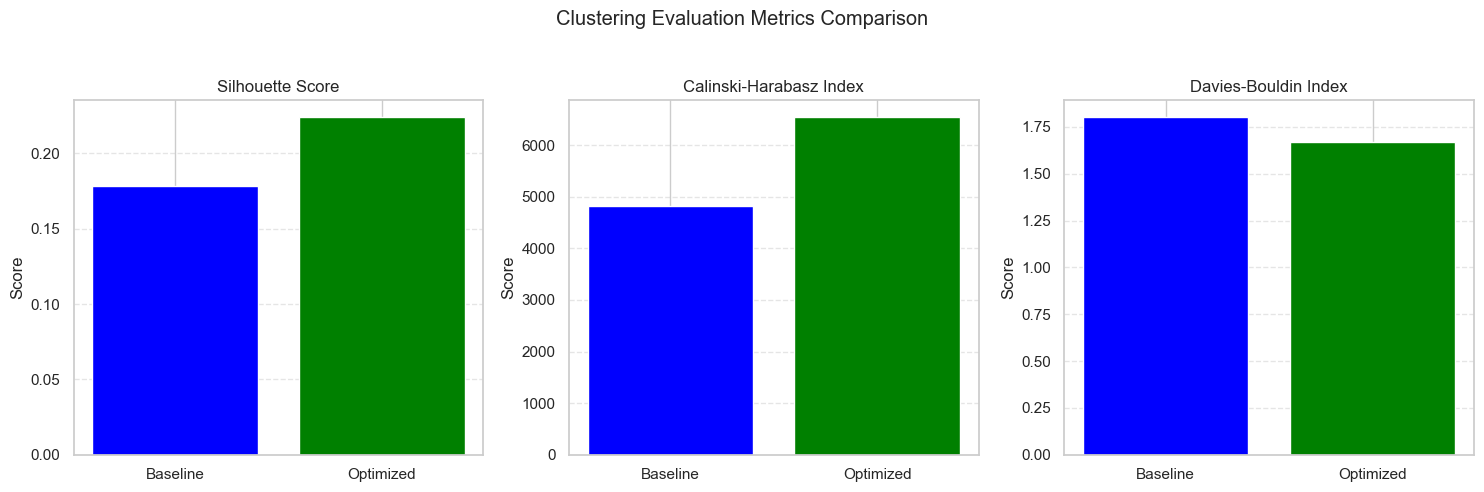

In [455]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

metrics = [
    ('Silhouette Score', baseline_silhouette, optimized_silhouette),
    ('Calinski-Harabasz Index', chi_baseline, chi_optimized),
    ('Davies-Bouldin Index', dbi_baseline, dbi_optimized),
]

for i, (title, base_val, opt_val) in enumerate(metrics):
    axs[i].bar(['Baseline', 'Optimized'], [base_val, opt_val], color=['blue', 'green'])
    axs[i].set_title(title)
    axs[i].set_ylabel('Score')
    axs[i].grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle('Clustering Evaluation Metrics Comparison')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
